In [8]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
beatafaron_wisdom_from_business_leaders_and_innovators_path = kagglehub.dataset_download('beatafaron/wisdom-from-business-leaders-and-innovators')

print('Data source import complete.')

Data source import complete.


In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
beatafaron_wisdom_from_business_leaders_and_innovators_path = kagglehub.dataset_download(
    'beatafaron/wisdom-from-business-leaders-and-innovators'
)

In [11]:
import os

for root, dirs, files in os.walk(beatafaron_wisdom_from_business_leaders_and_innovators_path):
    for f in files:
        print(os.path.join(root, f))


C:\Users\Enter Store\.cache\kagglehub\datasets\beatafaron\wisdom-from-business-leaders-and-innovators\versions\4\quotes-wisdom.csv


In [12]:
csv_path = os.path.join(
    beatafaron_wisdom_from_business_leaders_and_innovators_path,
    "quotes-wisdom.csv"
)

df = pd.read_csv(csv_path)
print(df.head())

                                               quote          author  \
0  It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1  Success is not how high you have climbed, but ...  Roy T. Bennett   
2  Be grateful for what you already have while yo...  Roy T. Bennett   
3  It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4  You never change your life until you step out ...  Roy T. Bennett   

    theme/tag                  source position   region decade  gender  
0  leadership  Goodreads – leadership   Author  Unknown  2010s    male  
1  leadership  Goodreads – leadership   Author  Unknown  2010s    male  
2  leadership  Goodreads – leadership   Author  Unknown  2010s    male  
3  leadership  Goodreads – leadership   Author   Europe  2000s  female  
4  leadership  Goodreads – leadership   Author  Unknown  2010s    male  


In [13]:
"""
import pandas as pd

#csv_file_path = os.path.join(beatafaron_wisdom_from_business_leaders_and_innovators_path, "quotes-wisdom.csv")
#df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

df = pd.read_csv('/kaggle/input/wisdom-from-business-leaders-and-innovators/quotes-wisdom.csv')

print(df.head())"""

'\nimport pandas as pd\n\n#csv_file_path = os.path.join(beatafaron_wisdom_from_business_leaders_and_innovators_path, "quotes-wisdom.csv")\n#df = pd.read_csv(csv_file_path, encoding=\'ISO-8859-1\')\n\ndf = pd.read_csv(\'/kaggle/input/wisdom-from-business-leaders-and-innovators/quotes-wisdom.csv\')\n\nprint(df.head())'

In [14]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender  
0       2010s     male  
1       2010s     male  
2       2010s     male  
3       2000s   female  
4       2010s     male  
...       ...      ...  
7864    2020s     male  
7865  Unknown  Unknown  
7866    2000s     male  
7867  Unknown  Unknown  
7868    2020s     male  

[7869 rows x 8 columns]

In [15]:
#target -> particularly semantic search, embedding evaluation, text classification, and recommendation systems.

In [16]:
"""
Each quote includes associated metadata such as the attributed author, their position, 
and relevant tags to support tasks like semantic search, text classification, or language modeling.

The dataset is ideal for applications in Natural Language Processing (NLP), such as:
    Semantic similarity search
    Quote generation
    Sentiment or theme classification
    Building educational or inspirational applications
"""

'\nEach quote includes associated metadata such as the attributed author, their position, \nand relevant tags to support tasks like semantic search, text classification, or language modeling.\n\nThe dataset is ideal for applications in Natural Language Processing (NLP), such as:\n    Semantic similarity search\n    Quote generation\n    Sentiment or theme classification\n    Building educational or inspirational applications\n'

In [17]:
# Split using en dash
df[['source_main', 'source_detail']] = df['source'].str.split('–', n=1, expand=True)

df['source_main'] = df['source_main'].str.strip()
df['source_detail'] = df['source_detail'].str.strip()

In [18]:
"""
# Identify person name (only for Wikiquote)
df['person_name'] = df.apply(
    lambda row: row['source_detail'] if row['source_main'] == 'Wikiquote' else None,
    axis=1
)

# Assign topic (for non-Wikiquote)
df['topic'] = df.apply(
    lambda row: row['source_detail'] if row['source_main'] in ['Goodreads', 'WisdomQuotes'] else None,
    axis=1
)

# Label type of source
def categorize_source(row):
    if row['source_main'] == 'Wikiquote':
        return 'Person'
    elif row['source_main'] in ['Goodreads', 'WisdomQuotes']:
        return 'Topic'
    else:
        return 'Other'

df['source_type'] = df.apply(categorize_source, axis=1)"""

"\n# Identify person name (only for Wikiquote)\ndf['person_name'] = df.apply(\n    lambda row: row['source_detail'] if row['source_main'] == 'Wikiquote' else None,\n    axis=1\n)\n\n# Assign topic (for non-Wikiquote)\ndf['topic'] = df.apply(\n    lambda row: row['source_detail'] if row['source_main'] in ['Goodreads', 'WisdomQuotes'] else None,\n    axis=1\n)\n\n# Label type of source\ndef categorize_source(row):\n    if row['source_main'] == 'Wikiquote':\n        return 'Person'\n    elif row['source_main'] in ['Goodreads', 'WisdomQuotes']:\n        return 'Topic'\n    else:\n        return 'Other'\n\ndf['source_type'] = df.apply(categorize_source, axis=1)"

In [19]:
#source_detail, topic , person_name ,
#source_main 	source_detail 	person_name 	topic 	source_type

In [20]:
df['position'].unique()

array(['Author', 'First Lady', 'Speaker', 'Philosopher', 'Unknown',
       'Prime Minister', 'Entrepreneur', 'Comedian',
       'Management Theorist', 'President', 'General', 'Mythologist',
       'Executive', 'Leadership Coach', 'Pastor', 'Spiritual Teacher',
       'Lawyer', 'Coach', 'Religious Leader', 'Historian', 'Writer',
       'Consultant', 'Motivational Speaker', 'Poet', 'Psychiatrist',
       'Martial Artist', 'Industrialist', 'Magician', 'PR Executive',
       'Musician', 'Surgeon', 'Physicist', 'Artist', 'Designer',
       'TV Host', 'Playwright', 'Inventor', 'Activist', 'Scholar',
       'Puppeteer', 'Investor', 'Athlete', 'Professor', 'Actress',
       'Statesman', 'Educator', 'Trainer', 'Singer', 'Cartoonist',
       'Priest', 'Character', 'Counselor', 'Engineer', 'Futurist',
       'Civil Rights Leader', 'Missionary', 'Leadership Expert',
       'Animator', 'Scientist', 'Journalist', 'Trader', 'Product Manager',
       'Economist', 'Neuroscientist', 'Editor', 'Boxer', '

In [21]:
df['position'].value_counts()

Author              1147
Philosopher         1116
Unknown              801
Physicist            736
Religious Leader     565
                    ... 
Actor                  1
Analyst                1
Boxer                  1
Editor                 1
Photographer           1
Name: position, Length: 81, dtype: int64

In [22]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail  
0       2010s     male     Goodreads    leadership  
1       2010s     male     Goodreads    leadership  
2       2010s     male     Goodreads    leadership  
3       2000s   female     Goodreads    leadership  
4       2010s     male     Goodreads    leadership  
...       ...      ...           ...           ...  
7864    2020s     male  WisdomQuotes    resilience  
7865  Unknown  Unknown  WisdomQuotes    resilience  
7866    2000s     male  WisdomQuotes    resilience  
7867  Unknown  Unknown  WisdomQuotes    resilience  
7868    2020s     male  WisdomQuotes    resilience  

[7869 rows x 10 columns]

In [23]:
df.head()

quote          author  \
0  It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1  Success is not how high you have climbed, but ...  Roy T. Bennett   
2  Be grateful for what you already have while yo...  Roy T. Bennett   
3  It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4  You never change your life until you step out ...  Roy T. Bennett   

    theme/tag                  source position   region decade  gender  \
0  leadership  Goodreads – leadership   Author  Unknown  2010s    male   
1  leadership  Goodreads – leadership   Author  Unknown  2010s    male   
2  leadership  Goodreads – leadership   Author  Unknown  2010s    male   
3  leadership  Goodreads – leadership   Author   Europe  2000s  female   
4  leadership  Goodreads – leadership   Author  Unknown  2010s    male   

  source_main source_detail  
0   Goodreads    leadership  
1   Goodreads    leadership  
2   Goodreads    leadership  
3   Goodreads    leadership  
4   Goodreads    leadership

In [24]:
# quote, author , theme/tag , source , position , region , decade , gender # these are the main column

In [25]:
#source_main 	source_detail 	person_name 	topic 	source_type

In [26]:
df['theme/tag'].unique()

array(['leadership', 'motivation', 'success', 'failure', 'risk'],
      dtype=object)

In [27]:
df['source'].unique()

array(['Goodreads – leadership', 'Goodreads – motivation',
       'Goodreads – success', 'Goodreads – failure', 'Goodreads – risk',
       'WisdomQuotes – leadership', 'WisdomQuotes – success',
       'WisdomQuotes – failure', 'WisdomQuotes – risk',
       'Goodreads – innovation', 'Goodreads – resilience',
       'Goodreads – vision', 'Quotes to Scrape', 'Wikiquote – Elon Musk',
       'Wikiquote – Steve Jobs', 'Wikiquote – Bill Gates',
       'Wikiquote – Oprah Winfrey', 'Wikiquote – Sheryl Sandberg',
       'Wikiquote – Jeff Bezos', 'Wikiquote – Satya Nadella',
       'Wikiquote – Indra Nooyi', 'Wikiquote – Mark Zuckerberg',
       'Wikiquote – Larry Page', 'Wikiquote – Sergey Brin',
       'Wikiquote – Tim Cook', 'Wikiquote – Peter Thiel',
       'Wikiquote – Marissa Mayer', 'Wikiquote – Warren Buffett',
       'Wikiquote – Richard Branson', 'Wikiquote – Michael Dell',
       'Wikiquote – Jack Ma', 'Wikiquote – Susan Wojcicki',
       'Wikiquote – Michael Bloomberg', 'Wikiquote – L

In [28]:
df['source_main'].unique()

array(['Goodreads', 'WisdomQuotes', 'Quotes to Scrape', 'Wikiquote'],
      dtype=object)

In [29]:
df['source_detail'].unique()

array(['leadership', 'motivation', 'success', 'failure', 'risk',
       'innovation', 'resilience', 'vision', None, 'Elon Musk',
       'Steve Jobs', 'Bill Gates', 'Oprah Winfrey', 'Sheryl Sandberg',
       'Jeff Bezos', 'Satya Nadella', 'Indra Nooyi', 'Mark Zuckerberg',
       'Larry Page', 'Sergey Brin', 'Tim Cook', 'Peter Thiel',
       'Marissa Mayer', 'Warren Buffett', 'Richard Branson',
       'Michael Dell', 'Jack Ma', 'Susan Wojcicki', 'Michael Bloomberg',
       'Larry Ellison', 'Carly Fiorina', 'Ben Horowitz', 'Douglas Adams',
       'Dante Alighieri', 'Aristotle', 'Emily Brontë', 'Buddha',
       'Confucius', 'Charles Darwin', 'Charles Dickens',
       'Albert Einstein', 'T S Eliot', 'Ralph Waldo Emerson',
       'Richard Feynman', 'Mahatma Gandhi', 'Jesus', 'John Keats',
       'Helen Keller', 'John F Kennedy', 'Martin Luther King Jr', 'Laozi',
       'Timothy Leary', 'Muhammad', 'Thomas Paine', 'Eleanor Roosevelt',
       'Bertrand Russell', 'William Saroyan', 'William Sha

In [30]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail  
0       2010s     male     Goodreads    leadership  
1       2010s     male     Goodreads    leadership  
2       2010s     male     Goodreads    leadership  
3       2000s   female     Goodreads    leadership  
4       2010s     male     Goodreads    leadership  
...       ...      ...           ...           ...  
7864    2020s     male  WisdomQuotes    resilience  
7865  Unknown  Unknown  WisdomQuotes    resilience  
7866    2000s     male  WisdomQuotes    resilience  
7867  Unknown  Unknown  WisdomQuotes    resilience  
7868    2020s     male  WisdomQuotes    resilience  

[7869 rows x 10 columns]

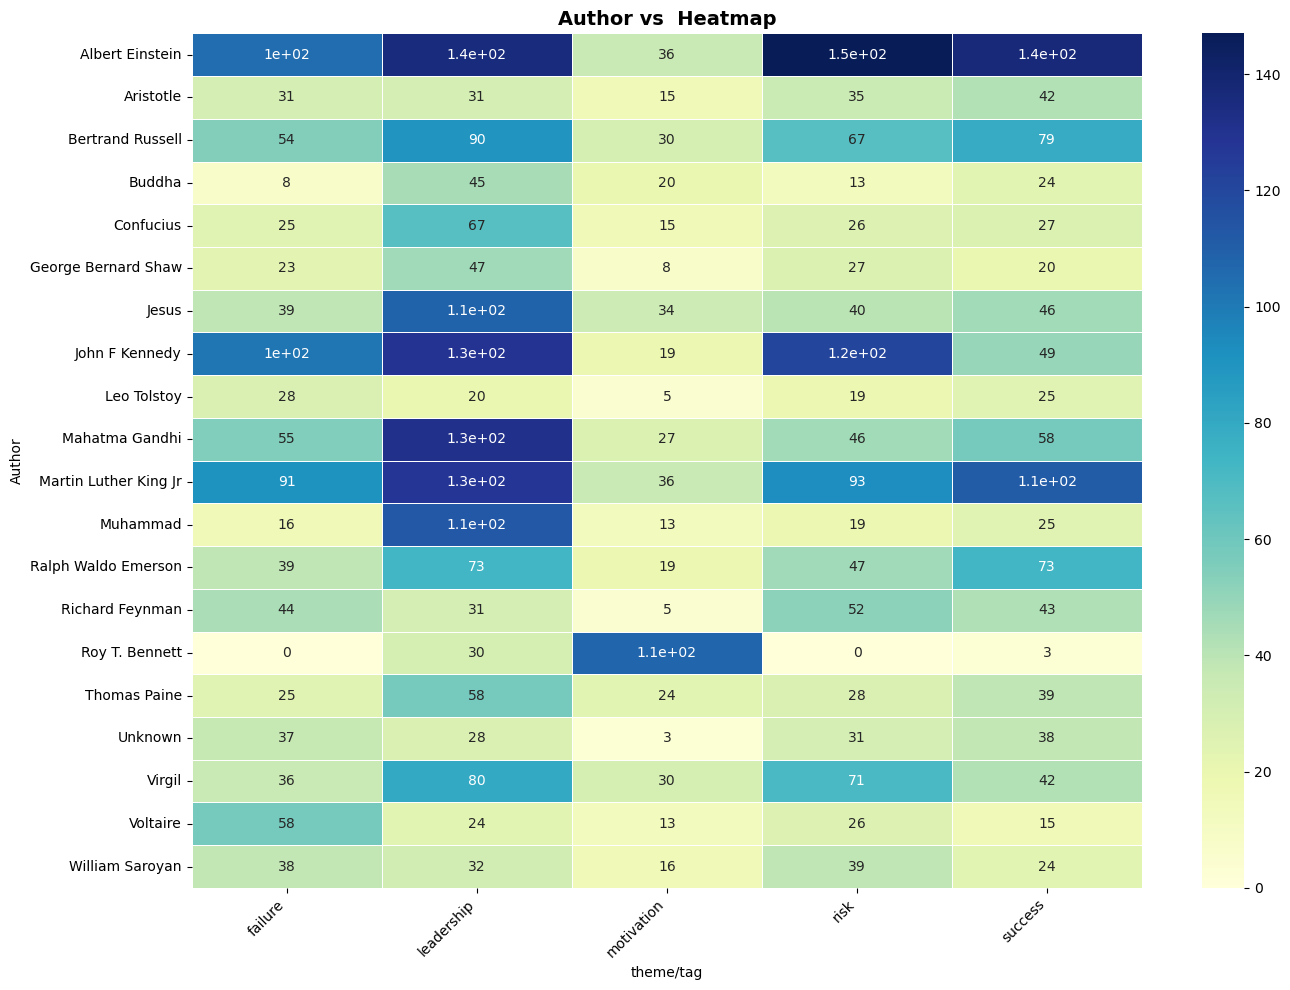

In [31]:
import pandas as pd

heatmap_data = pd.crosstab(
    df['author'],
    df['theme/tag']
)

top_authors = df['author'].value_counts().head(20).index
top_sources = df['theme/tag'].value_counts().index

heatmap_data = pd.crosstab(
    df[df['author'].isin(top_authors) & df['theme/tag'].isin(top_sources)]['author'],
    df[df['author'].isin(top_authors) & df['theme/tag'].isin(top_sources)]['theme/tag']
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True   # turn ON if matrix is small
)

plt.title("Author vs  Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("theme/tag")
plt.ylabel("Author")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

Percentage of rows where author == source_detail: 71.78%
✅ Using 'source_detail' (author and source_detail are only 71.8% equal)


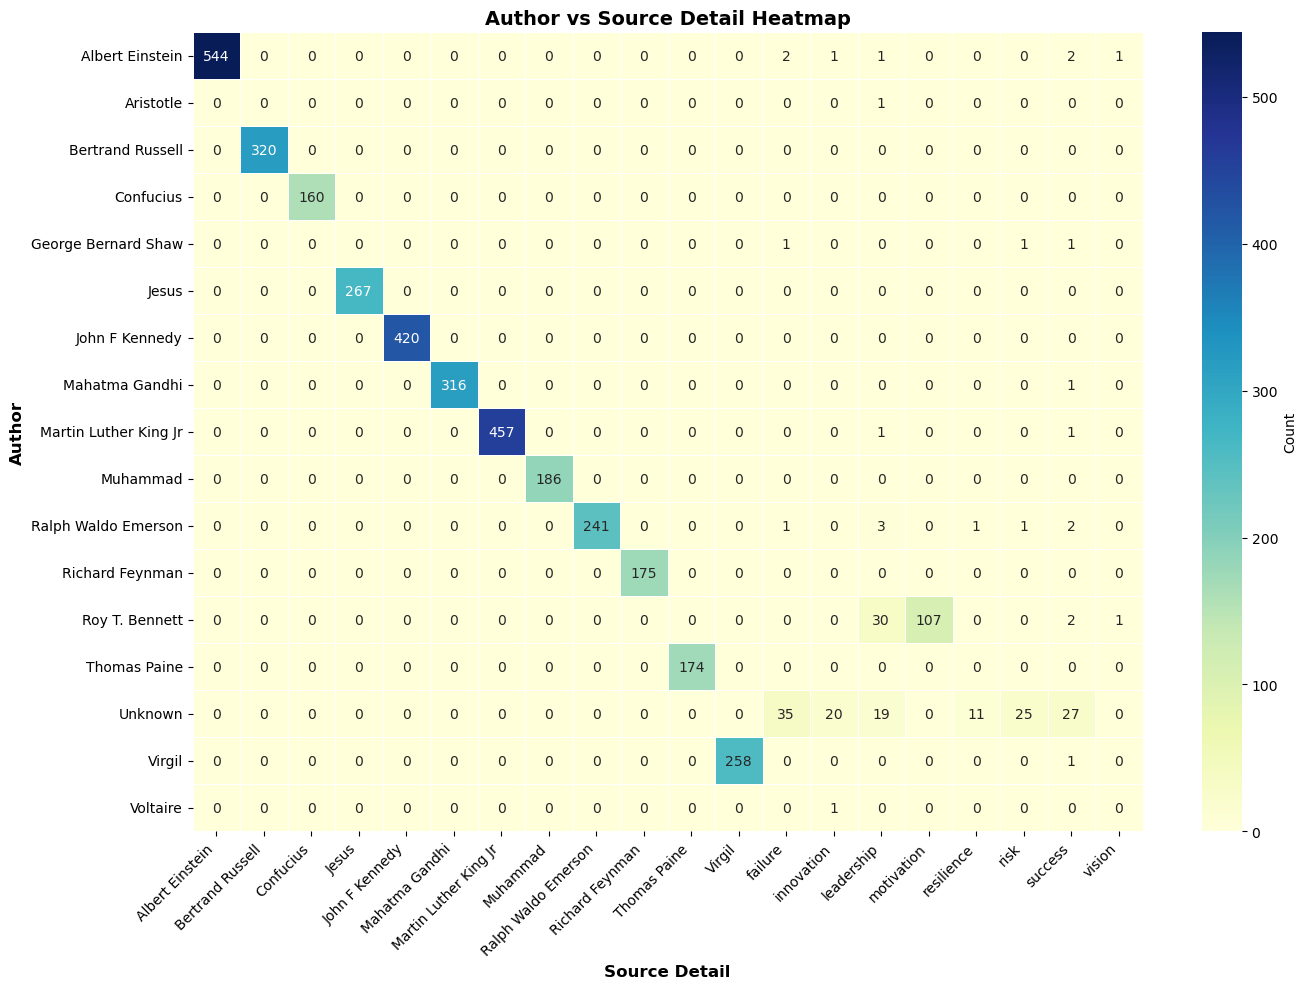


✅ Heatmap created: (17, 20)


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check if author and source_detail are mostly equal
are_mostly_equal = (df['author'] == df['source_detail']).sum() / len(df)

print(f"Percentage of rows where author == source_detail: {are_mostly_equal * 100:.2f}%")

# Set threshold (e.g., if more than 80% are equal, use theme/tag instead)
THRESHOLD = 0.8

if are_mostly_equal > THRESHOLD:
    print(f"✅ Using 'theme/tag' instead (author and source_detail are {are_mostly_equal*100:.1f}% equal)")
    
    # Use theme/tag instead of source_detail
    column_to_use = 'theme/tag'
    
    # Get top authors and themes
    top_authors = df['author'].value_counts().head(20).index
    top_items = df[column_to_use].value_counts().head(20).index
    
    # Create heatmap data
    heatmap_data = pd.crosstab(
        df[df['author'].isin(top_authors) & df[column_to_use].isin(top_items)]['author'],
        df[df['author'].isin(top_authors) & df[column_to_use].isin(top_items)][column_to_use]
    )
    
    xlabel = "Theme/Tag"
    title = "Author vs Theme/Tag Heatmap"
    
else:
    print(f"✅ Using 'source_detail' (author and source_detail are only {are_mostly_equal*100:.1f}% equal)")
    
    # Use source_detail as originally intended
    column_to_use = 'source_detail'
    
    # Get top authors and sources
    top_authors = df['author'].value_counts().head(20).index
    top_items = df[column_to_use].value_counts().head(20).index
    
    # Create heatmap data
    heatmap_data = pd.crosstab(
        df[df['author'].isin(top_authors) & df[column_to_use].isin(top_items)]['author'],
        df[df['author'].isin(top_authors) & df[column_to_use].isin(top_items)][column_to_use]
    )
    
    xlabel = "Source Detail"
    title = "Author vs Source Detail Heatmap"

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True if heatmap_data.shape[0] * heatmap_data.shape[1] < 400 else False,
    fmt='d',
    cbar_kws={'label': 'Count'}
)
plt.title(title, fontsize=14, fontweight='bold')
plt.xlabel(xlabel, fontsize=12, fontweight='bold')
plt.ylabel("Author", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\n✅ Heatmap created: {heatmap_data.shape}")

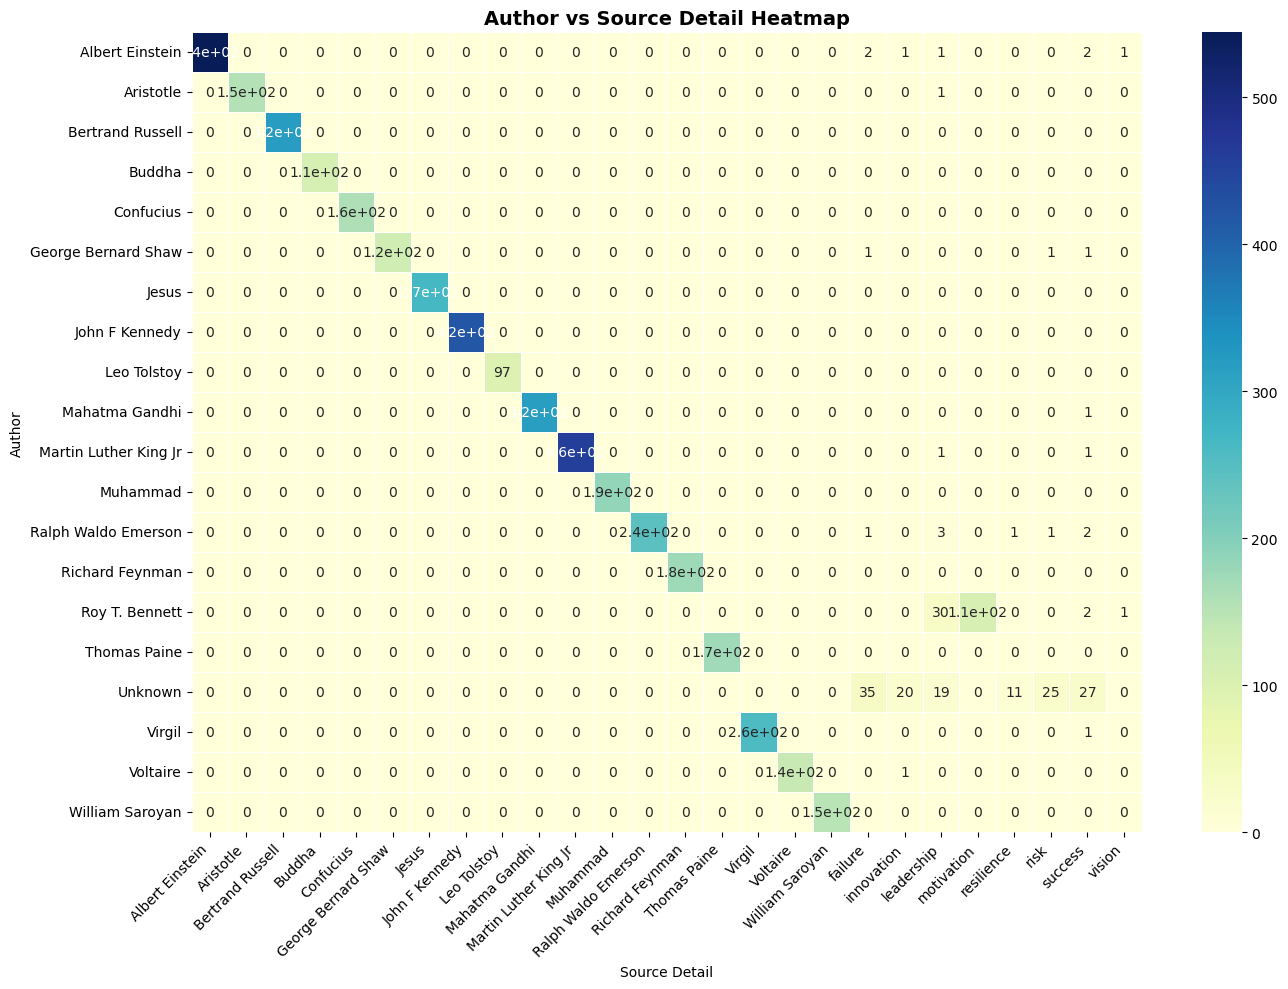

In [33]:
import pandas as pd

heatmap_data = pd.crosstab(
    df['author'],
    df['source_detail']
)

top_authors = df['author'].value_counts().head(20).index
top_sources = df['source_detail'].value_counts().index

heatmap_data = pd.crosstab(
    df[df['author'].isin(top_authors) & df['source_detail'].isin(top_sources)]['author'],
    df[df['author'].isin(top_authors) & df['source_detail'].isin(top_sources)]['source_detail']
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True   # turn ON if matrix is small
)

plt.title("Author vs Source Detail Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("Source Detail")
plt.ylabel("Author")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='source_detail', ylabel='author'>

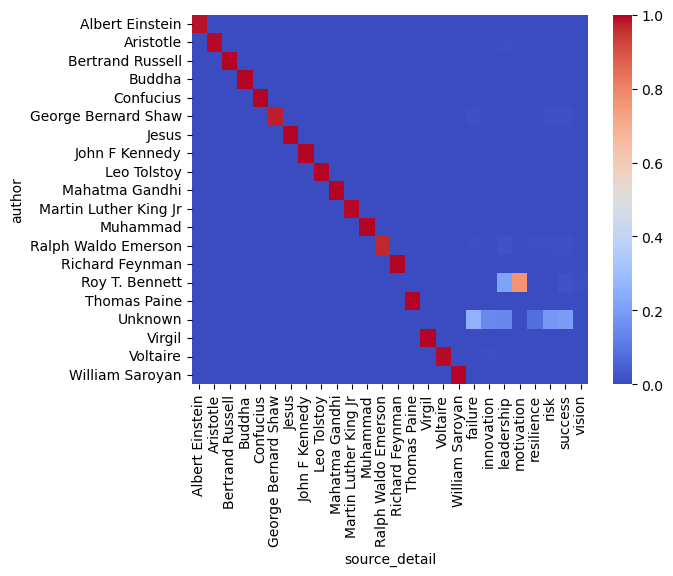

In [34]:
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

sns.heatmap(heatmap_norm, cmap='coolwarm')

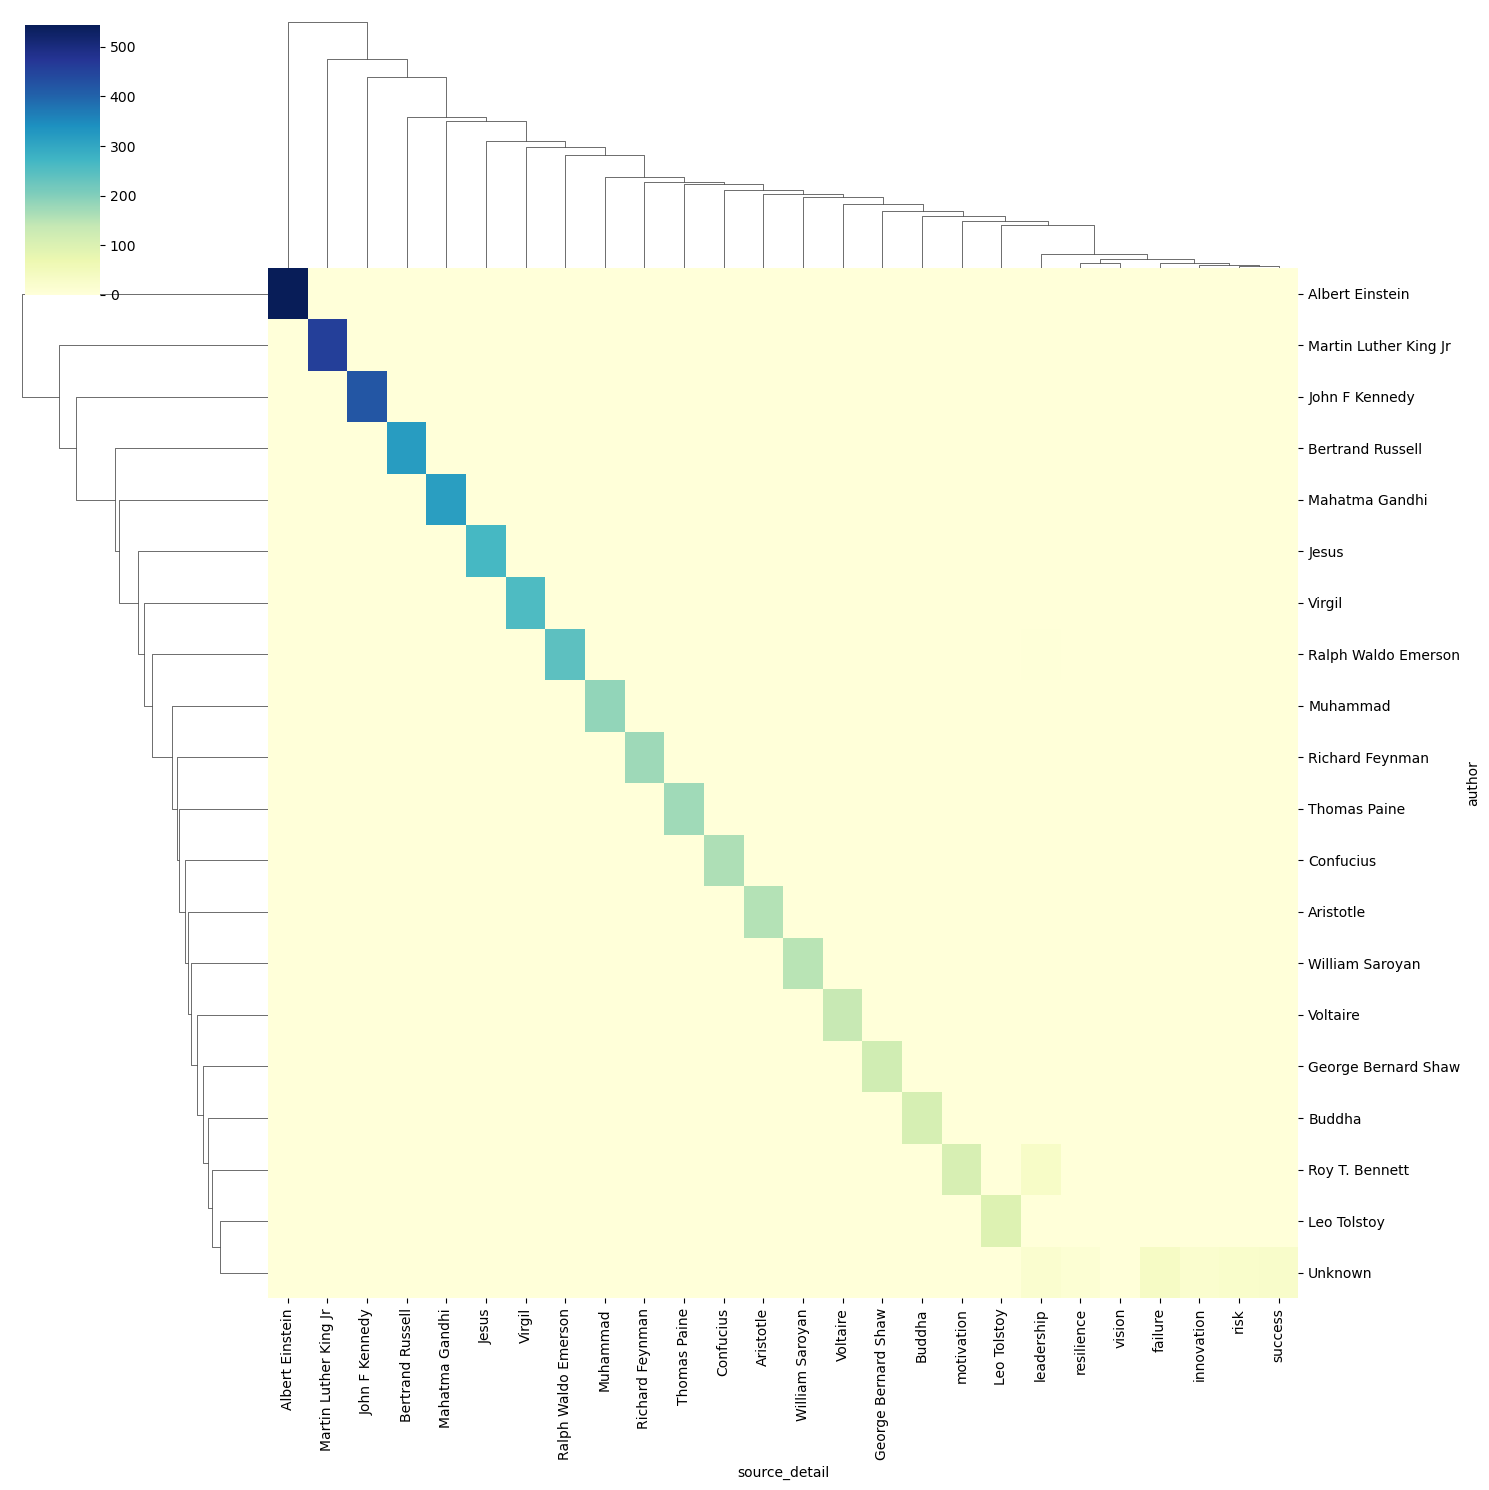

In [35]:
sns.clustermap(
    heatmap_data,
    cmap='YlGnBu',
    figsize=(15, 15)
)

In [36]:
import numpy as np

df['source_summary'] = np.where(
    df['source_detail'] == df['author'],
    df['theme/tag'],
    df['source_detail']
)

In [37]:
df['source_summary'].unique()

array(['leadership', 'motivation', 'success', 'failure', 'risk',
       'innovation', 'resilience', 'vision', None], dtype=object)

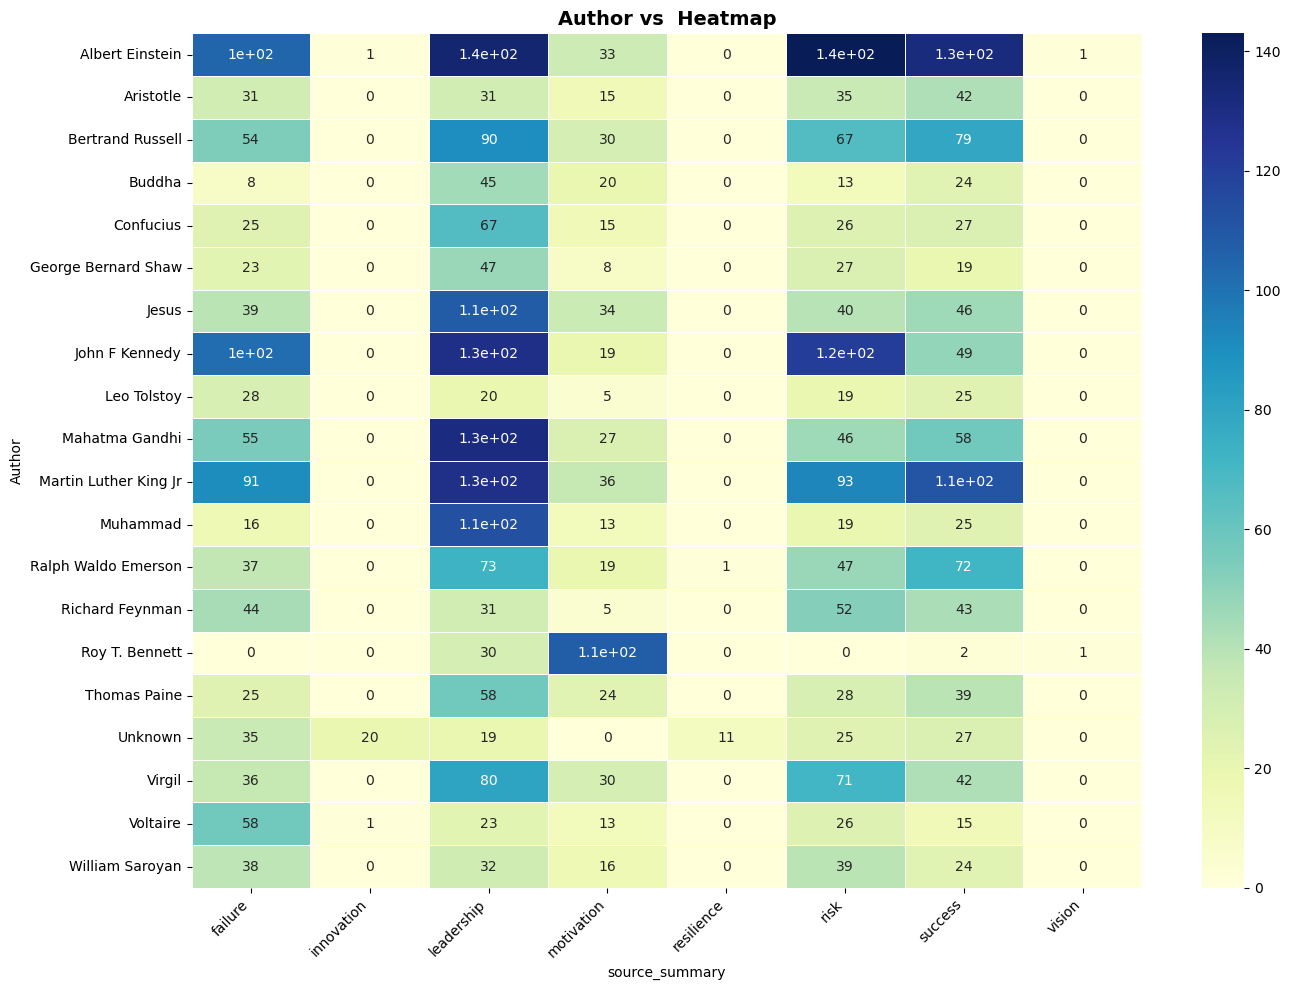

In [38]:
import pandas as pd

heatmap_data1 = pd.crosstab(
    df['author'],
    df['source_summary']
)

top_authors = df['author'].value_counts().head(20).index
top_sources = df['source_summary'].value_counts().index

heatmap_data1 = pd.crosstab(
    df[df['author'].isin(top_authors) & df['source_summary'].isin(top_sources)]['author'],
    df[df['author'].isin(top_authors) & df['source_summary'].isin(top_sources)]['source_summary']
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

sns.heatmap(
    heatmap_data1,
    cmap='YlGnBu',
    linewidths=0.5,
    annot=True   # turn ON if matrix is small
)

plt.title("Author vs  Heatmap", fontsize=14, fontweight='bold')
plt.xlabel("source_summary")
plt.ylabel("Author")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

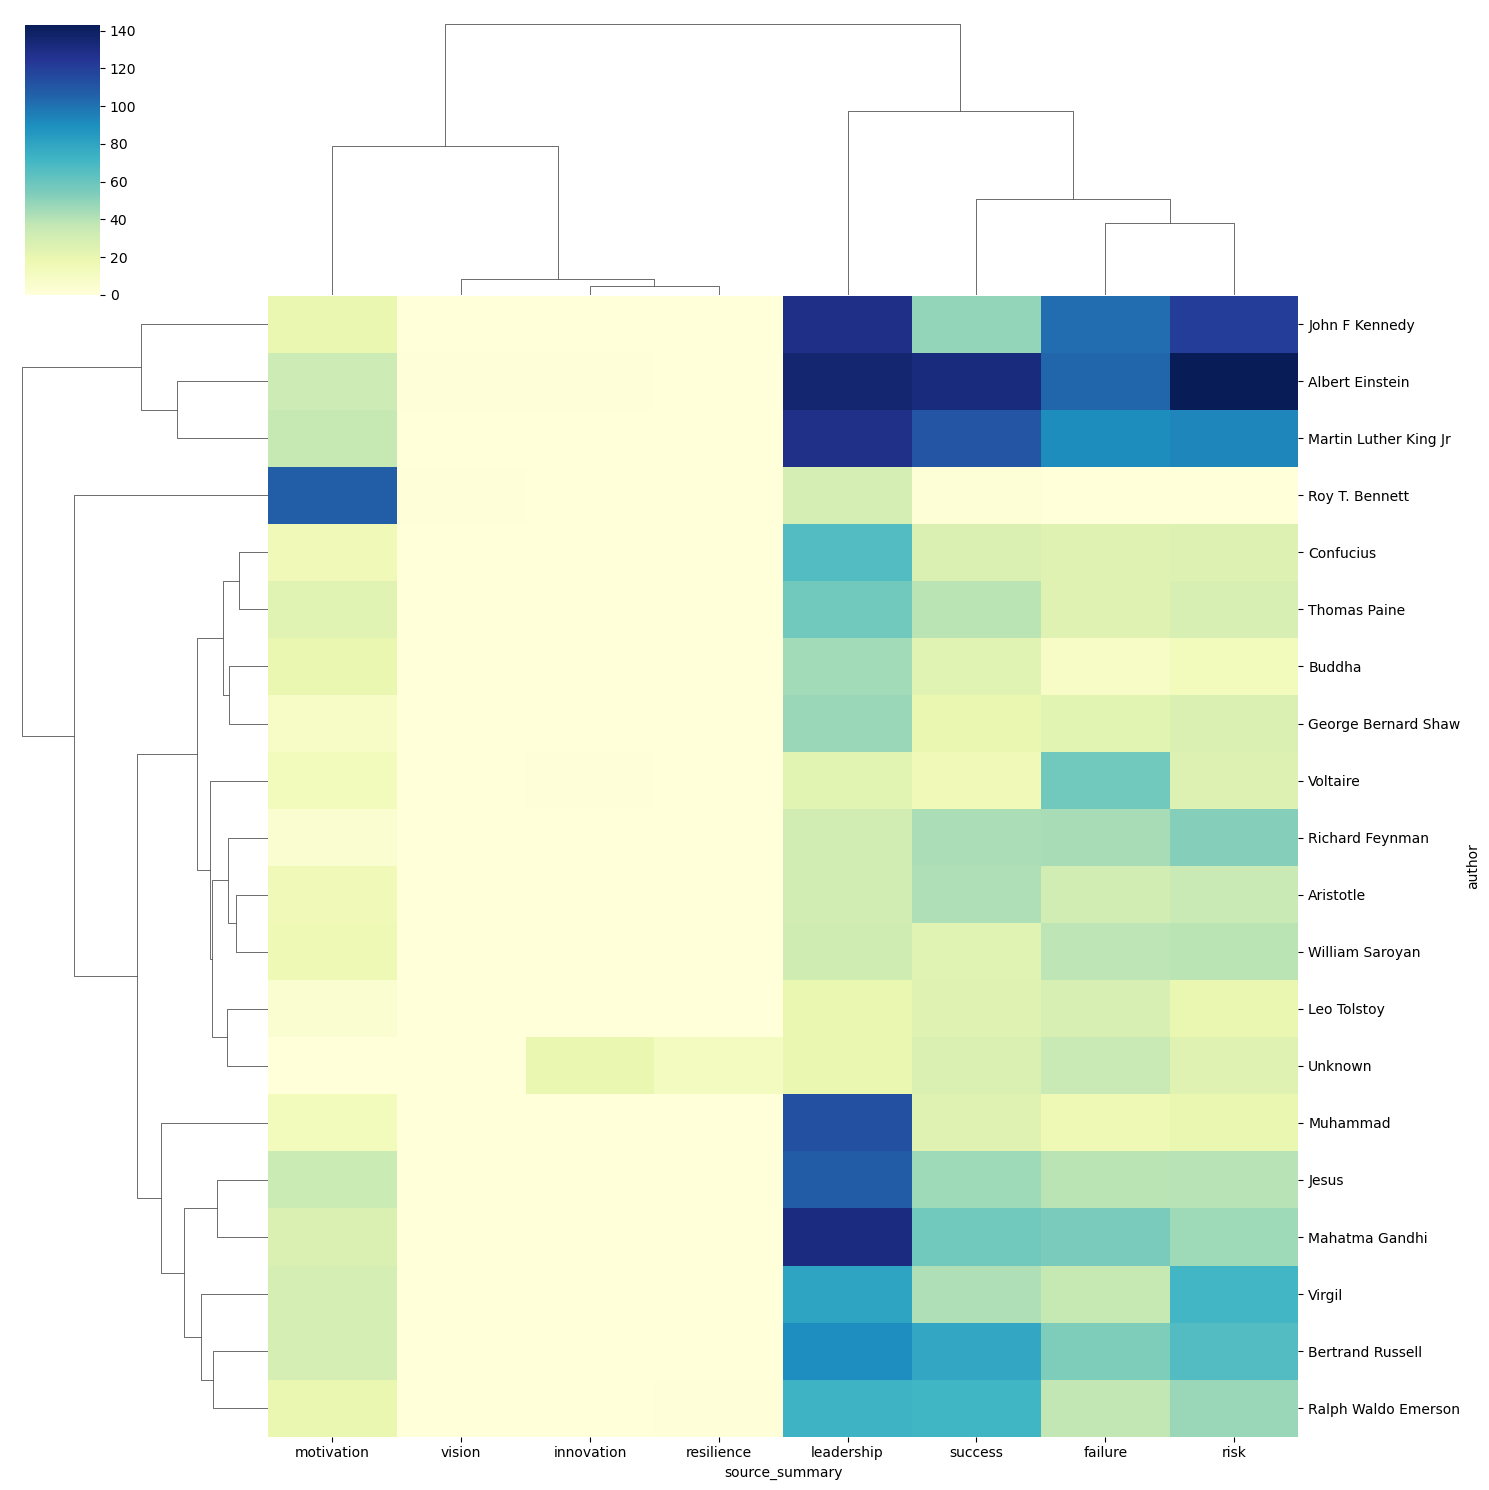

In [39]:
sns.clustermap(
    heatmap_data1,
    cmap='YlGnBu',
    figsize=(15, 15)
)

In [40]:
top_authors = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
      .sort_values(['source_summary', 'count'], ascending=[True, False])
      .groupby('source_summary')
      .head(5)
)

top_authors

source_summary                 author  count
3           failure        Albert Einstein    105
102         failure         John F Kennedy    102
141         failure  Martin Luther King Jr     91
240         failure               Voltaire     58
130         failure         Mahatma Gandhi     55
251      innovation         Abhijit Naskar     30
382      innovation                Unknown     20
383      innovation     Victoria Silchenko     20
355      innovation            Roger Spitz     13
371      innovation         Steven Johnson     10
394      leadership        Albert Einstein    136
482      leadership         Mahatma Gandhi    131
461      leadership         John F Kennedy    129
491      leadership  Martin Luther King Jr    128
502      leadership               Muhammad    113
665      motivation         Roy T. Bennett    107
647      motivation  Martin Luther King Jr     36
630      motivation                  Jesus     34
588      motivation        Albert Einstein     33
597      motivation       Bertrand Russell     30
758      resilience          Itayi Garande     22
743      resilience        Erik Pevernagie     15
857      resilience                Unknown     11
746      resilience        Felecia Etienne     10
761      resilience           Jack Butcher      9
866            risk        Albert Einstein    143
970            risk         John F Kennedy    121
1001           risk  Martin Luther King Jr     93
1094           risk                 Virgil     71
881            risk       Bertrand Russell     67
1109        success        Albert Einstein    132
1208        success  Martin Luther King Jr    111
1119        success       Bertrand Russell     79
1229        success    Ralph Waldo Emerson     72
1202        success         Mahatma Gandhi     58
1357         vision          Itayi Garande     15
1336         vision        Erik Pevernagie      9
1323         vision      Curtis L. Jenkins      6
1343         vision         Gift Gugu Mona      6
1321         vision   Craig D. Lounsbrough      4

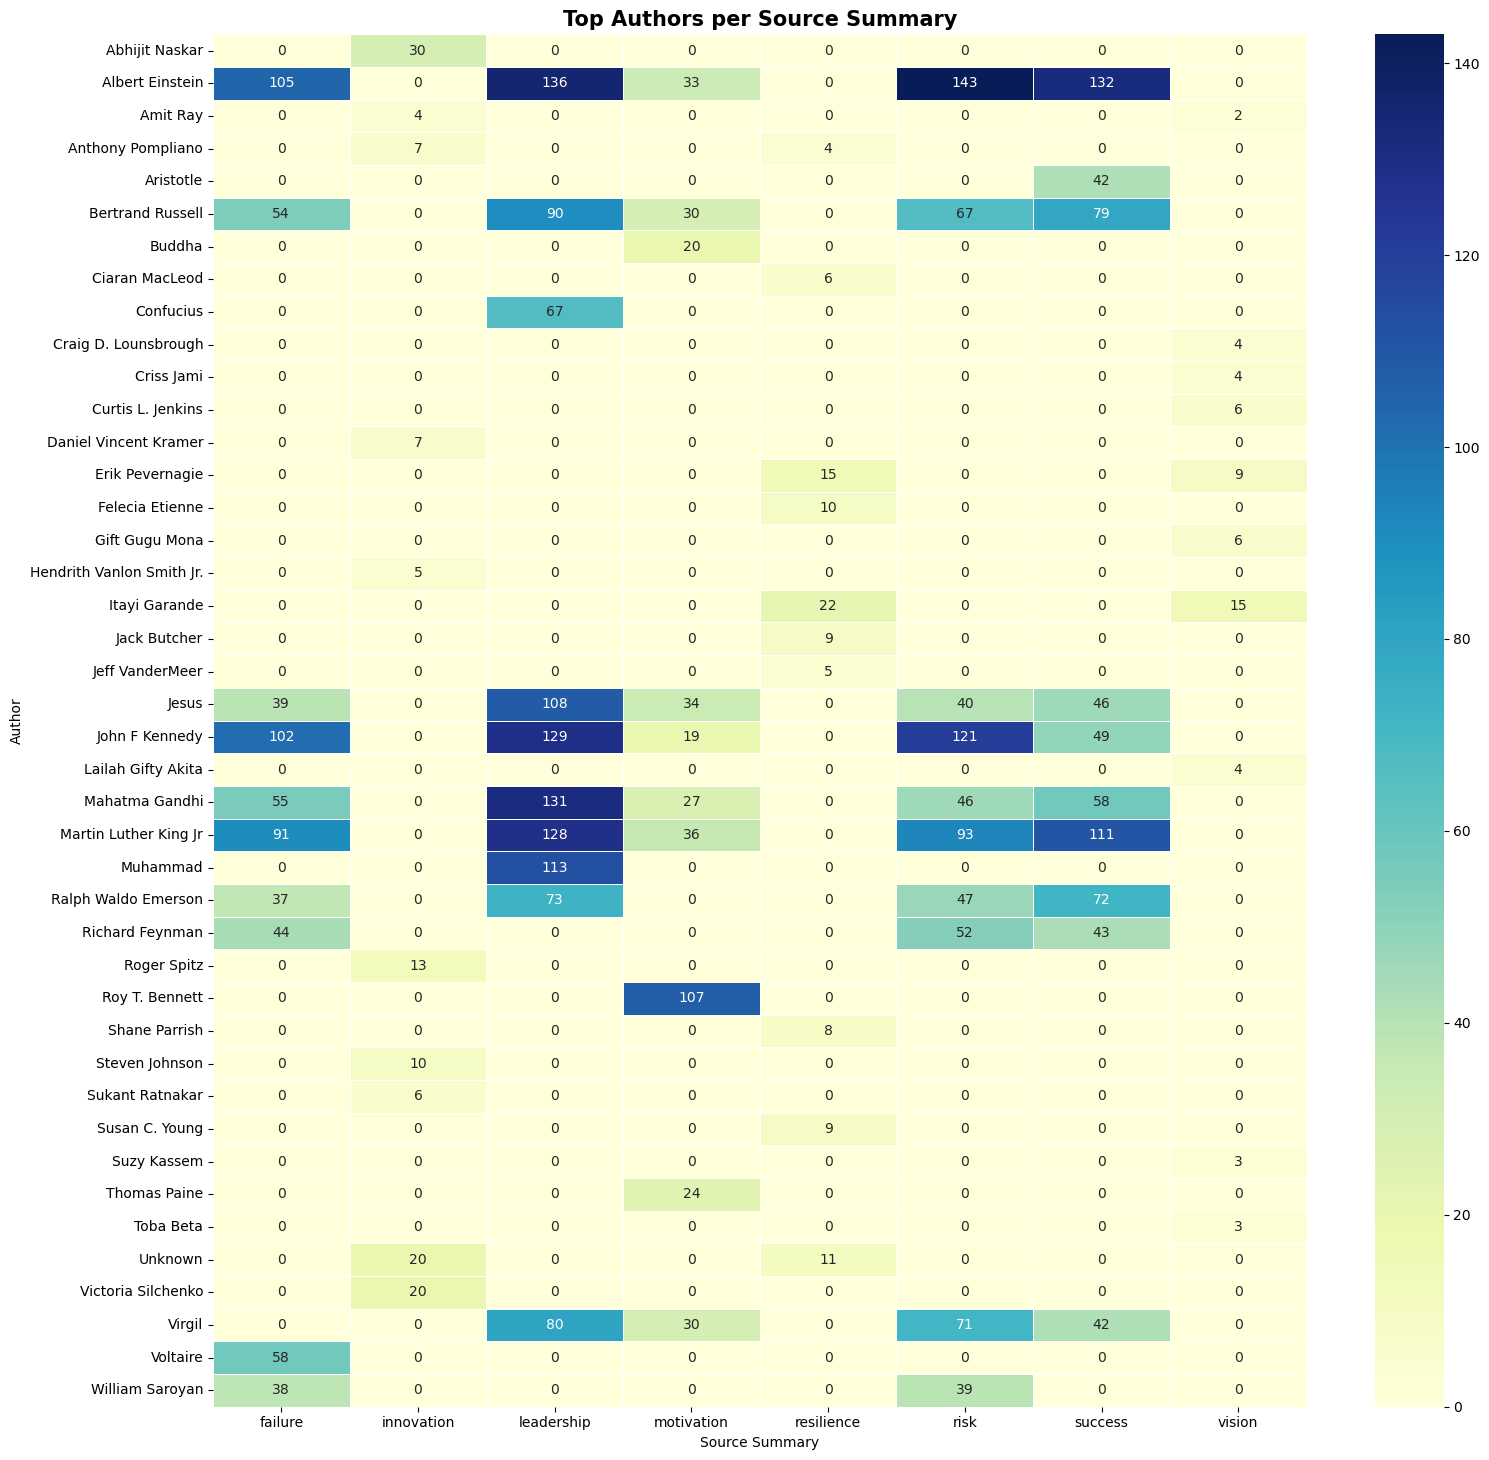

In [41]:
N = 10  # number of authors per source_summary

filtered = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
      .sort_values(['source_summary', 'count'], ascending=[True, False])
      .groupby('source_summary')
      .head(N)
)
heatmap_data = filtered.pivot(
    index='author',
    columns='source_summary',
    values='count'
).fillna(0)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, max(8, len(heatmap_data) * 0.35)))

sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    linewidths=0.4,
    annot=True,
    fmt='.0f'
)

plt.title("Top Authors per Source Summary", fontsize=15, fontweight='bold')
plt.xlabel("Source Summary")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='source_summary', ylabel='author'>

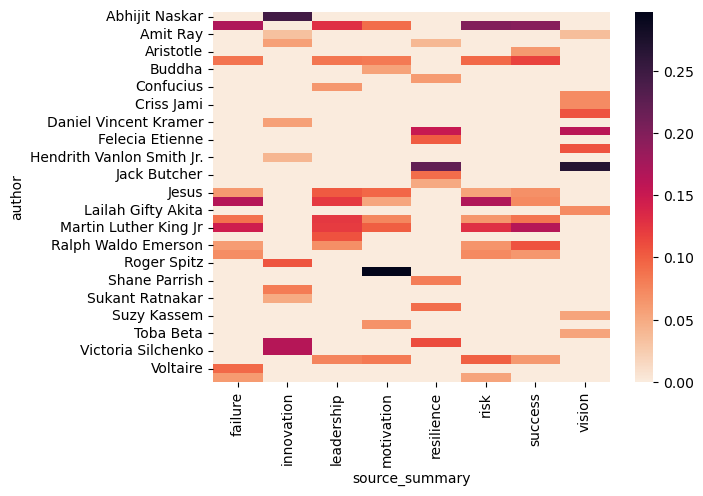

In [42]:
heatmap_norm = heatmap_data.div(heatmap_data.sum(axis=0), axis=1)

sns.heatmap(
    heatmap_norm,
    cmap='rocket_r',
    annot=False
)

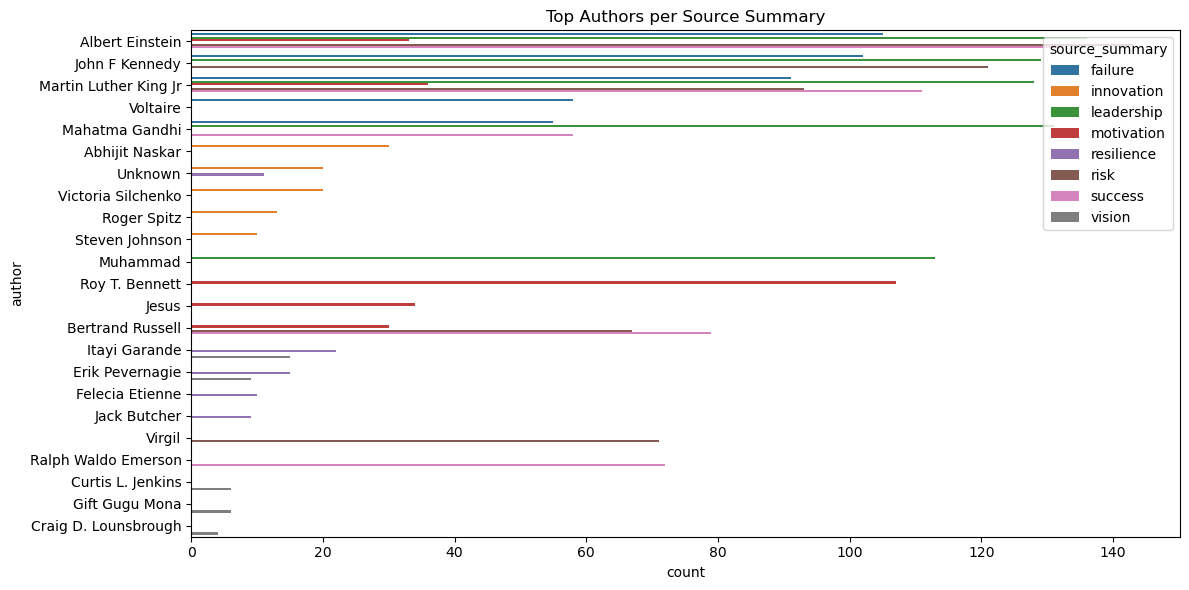

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_authors,
    x='count',
    y='author',
    hue='source_summary'
)
plt.title("Top Authors per Source Summary")
plt.tight_layout()
plt.show()

In [44]:
"""df_plot = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
)

n_authors = df_plot['author'].nunique()
n_sources = df_plot['source_summary'].nunique()

height = max(8, n_authors * 0.25)

sns.barplot(
    data=df_plot,
    x='count',
    y='author',
    hue='source_summary'
)
plt.title("Top Authors per Source Summary")
plt.tight_layout()
plt.show()"""

'df_plot = (\n    df.groupby([\'source_summary\', \'author\'])\n      .size()\n      .reset_index(name=\'count\')\n)\n\nn_authors = df_plot[\'author\'].nunique()\nn_sources = df_plot[\'source_summary\'].nunique()\n\nheight = max(8, n_authors * 0.25)\n\nsns.barplot(\n    data=df_plot,\n    x=\'count\',\n    y=\'author\',\n    hue=\'source_summary\'\n)\nplt.title("Top Authors per Source Summary")\nplt.tight_layout()\nplt.show()'

In [45]:
"""
df_plot = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
)

n_authors = df_plot['author'].nunique()
n_sources = df_plot['source_summary'].nunique()

height = max(8, n_authors * 0.25)

plt.figure(figsize=(16, height))   # 👈 use your calculated height

sns.barplot(
    data=df_plot,
    x='count',
    y='author',
    hue='source_summary'
)

plt.title("Authors per Source Summary", fontsize=14, fontweight='bold')
plt.xlabel("Count")
plt.ylabel("Author")
plt.tight_layout()
plt.show()"""

'\ndf_plot = (\n    df.groupby([\'source_summary\', \'author\'])\n      .size()\n      .reset_index(name=\'count\')\n)\n\nn_authors = df_plot[\'author\'].nunique()\nn_sources = df_plot[\'source_summary\'].nunique()\n\nheight = max(8, n_authors * 0.25)\n\nplt.figure(figsize=(16, height))   # 👈 use your calculated height\n\nsns.barplot(\n    data=df_plot,\n    x=\'count\',\n    y=\'author\',\n    hue=\'source_summary\'\n)\n\nplt.title("Authors per Source Summary", fontsize=14, fontweight=\'bold\')\nplt.xlabel("Count")\nplt.ylabel("Author")\nplt.tight_layout()\nplt.show()'

<AxesSubplot:xlabel='count', ylabel='author'>

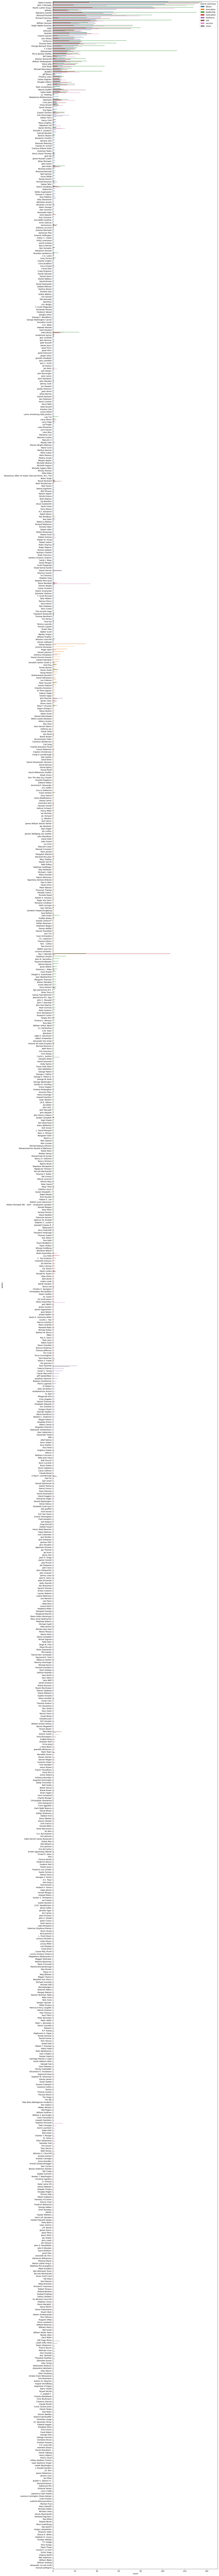

In [46]:
df_plot = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
)

n_authors = df_plot['author'].nunique()
n_sources = df_plot['source_summary'].nunique()

height = max(8, n_authors * 0.25)

plt.figure(figsize=(16, height))

df_plot_sorted = df_plot.sort_values(
    ['source_summary', 'count'],
    ascending=[True, False]
)

sns.barplot(
    data=df_plot_sorted,
    x='count',
    y='author',
    hue='source_summary'
)

In [47]:
"""df_plot = (
    df.groupby(['source_summary', 'author'])
      .size()
      .reset_index(name='count')
)

n_authors = df_plot['author'].nunique()
n_sources = df_plot['source_summary'].nunique()

height = max(8, n_authors * 0.25)

g = sns.catplot(
    data=df_plot,
    x='count',
    y='author',
    col='source_summary',
    kind='bar',
    col_wrap=3,
    height=height / n_sources,
    aspect=1.2,
    sharey=False
)

g.set_titles("{col_name}")
g.set_axis_labels("Count", "Author")
plt.tight_layout()
plt.show()"""

'df_plot = (\n    df.groupby([\'source_summary\', \'author\'])\n      .size()\n      .reset_index(name=\'count\')\n)\n\nn_authors = df_plot[\'author\'].nunique()\nn_sources = df_plot[\'source_summary\'].nunique()\n\nheight = max(8, n_authors * 0.25)\n\ng = sns.catplot(\n    data=df_plot,\n    x=\'count\',\n    y=\'author\',\n    col=\'source_summary\',\n    kind=\'bar\',\n    col_wrap=3,\n    height=height / n_sources,\n    aspect=1.2,\n    sharey=False\n)\n\ng.set_titles("{col_name}")\ng.set_axis_labels("Count", "Author")\nplt.tight_layout()\nplt.show()'

In [48]:
"""heatmap_df = (
    df.groupby(['author', 'source_summary'])
      .size()
      .reset_index(name='count')
      .pivot(index='author', columns='source_summary', values='count')
      .fillna(0)
)

plt.figure(figsize=(16, max(8, len(heatmap_df) * 0.25)))
sns.heatmap(
    heatmap_df,
    cmap='YlGnBu',
    linewidths=0.3,
    cbar=True
)

plt.title("Author vs Source Summary (All Authors)")
plt.xlabel("Source Summary")
plt.ylabel("Author")
plt.tight_layout()
plt.show()"""

'heatmap_df = (\n    df.groupby([\'author\', \'source_summary\'])\n      .size()\n      .reset_index(name=\'count\')\n      .pivot(index=\'author\', columns=\'source_summary\', values=\'count\')\n      .fillna(0)\n)\n\nplt.figure(figsize=(16, max(8, len(heatmap_df) * 0.25)))\nsns.heatmap(\n    heatmap_df,\n    cmap=\'YlGnBu\',\n    linewidths=0.3,\n    cbar=True\n)\n\nplt.title("Author vs Source Summary (All Authors)")\nplt.xlabel("Source Summary")\nplt.ylabel("Author")\nplt.tight_layout()\nplt.show()'

In [49]:
"""plt.figure(figsize=(16, max(8, len(heatmap_df) * 0.25)))

sns.heatmap(
    heatmap_df,
    cmap='YlGnBu',
    linewidths=0.3,
    cbar=True,
    annot=True,        # 👈 show counts
    fmt='g',           # 👈 integer format
    annot_kws={"size": 8}  # 👈 control text size
)

plt.title("Author vs Source Summary (All Authors)")
plt.xlabel("Source Summary")
plt.ylabel("Author")
plt.tight_layout()
plt.show()"""

'plt.figure(figsize=(16, max(8, len(heatmap_df) * 0.25)))\n\nsns.heatmap(\n    heatmap_df,\n    cmap=\'YlGnBu\',\n    linewidths=0.3,\n    cbar=True,\n    annot=True,        # 👈 show counts\n    fmt=\'g\',           # 👈 integer format\n    annot_kws={"size": 8}  # 👈 control text size\n)\n\nplt.title("Author vs Source Summary (All Authors)")\nplt.xlabel("Source Summary")\nplt.ylabel("Author")\nplt.tight_layout()\nplt.show()'

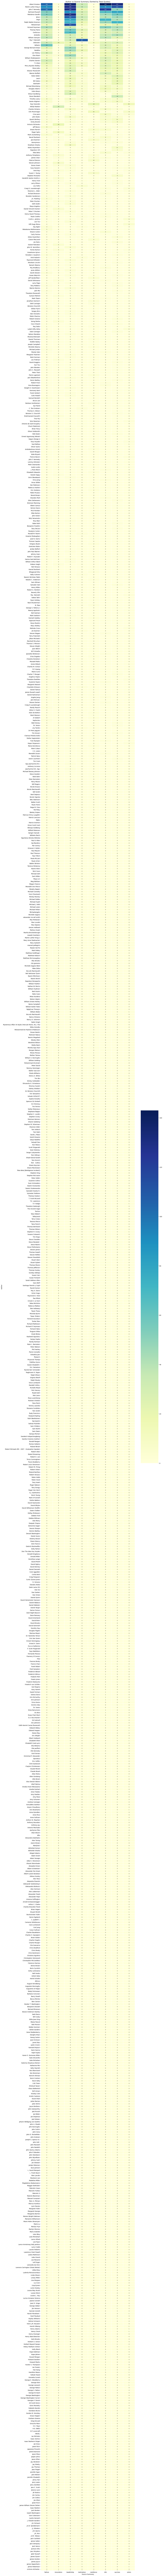

In [50]:
# Sort authors by total count (descending)
heatmap_df = (
    df.groupby(['author', 'source_summary'])
      .size()
      .reset_index(name='count')
      .pivot(index='author', columns='source_summary', values='count')
      .fillna(0)
)

heatmap_df_sorted = heatmap_df.loc[
    heatmap_df.sum(axis=1).sort_values(ascending=False).index
]
plt.figure(figsize=(16, max(8, len(heatmap_df_sorted) * 0.25)))

sns.heatmap(
    heatmap_df_sorted,
    cmap='YlGnBu',
    linewidths=0.3,
    cbar=True,
    annot=True,
    fmt='g',
    annot_kws={"size": 8}
)

plt.title("Author vs Source Summary (Sorted by Total Quotes)")
plt.xlabel("Source Summary")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

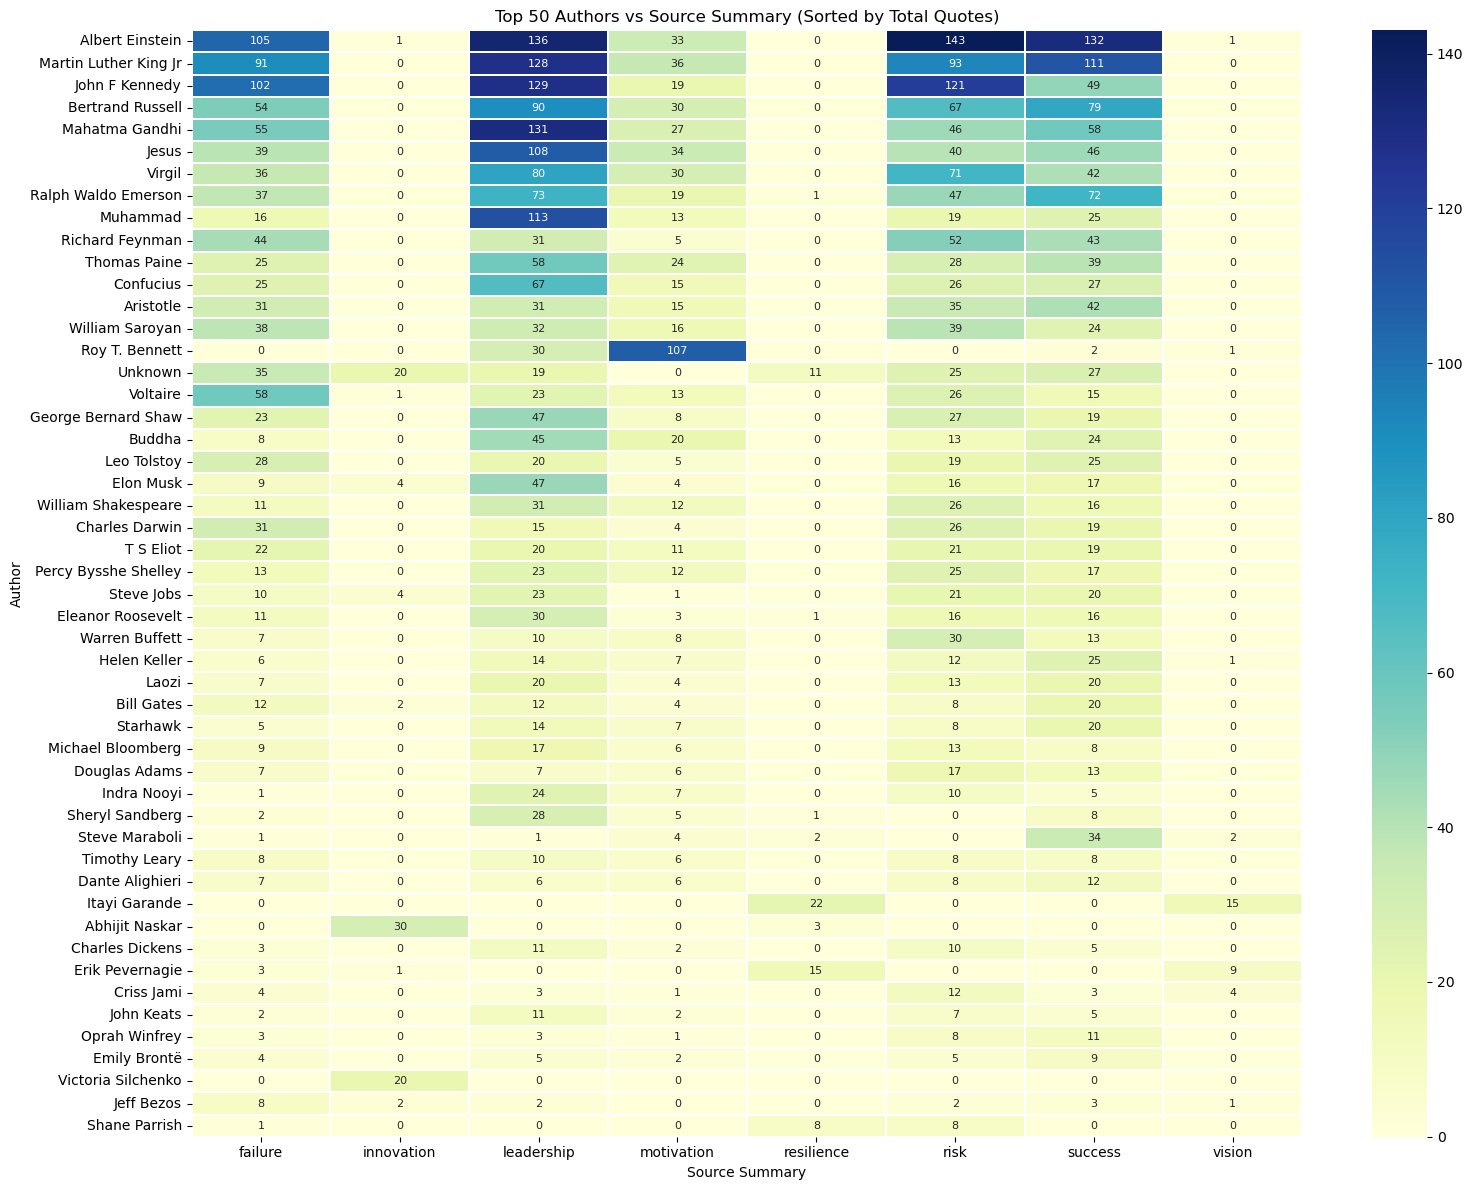

In [51]:
heatmap_df_sorted = heatmap_df.loc[
    heatmap_df.sum(axis=1).sort_values(ascending=False).index
].head(50)  

plt.figure(figsize=(16, 12)) 

sns.heatmap(
    heatmap_df_sorted,
    cmap='YlGnBu',
    linewidths=0.3,
    cbar=True,
    annot=True,
    fmt='g',
    annot_kws={"size": 8}
)

plt.title("Top 50 Authors vs Source Summary (Sorted by Total Quotes)")
plt.xlabel("Source Summary")
plt.ylabel("Author")
plt.tight_layout()
plt.show()

In [52]:
df_q = df[['quote']].copy()

In [53]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import contractions

def safe_fix(text):
    try:
        return contractions.fix(text)
    except Exception:
        return text

df_q['expanded_quote'] = df_q['quote'].apply(lambda x: safe_fix(x) if isinstance(x, str) else x)

In [55]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [56]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def clean_text(text, spell_correct=False, remove_stopwords=True):

    if not isinstance(text, str):
        return ""

    # 1. Lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http\S+|www\.\S+|https\S+', '', text)

    # 3. Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)

    # 3. REMOVE datetime FIRST ✅
    text = re.sub(
        r'on\s+\w+,\s+\d{4}-\d{2}-\d{2}\s+at\s+\d{1,2}:\d{2}',
        '',
        text,
        flags=re.IGNORECASE
    )

    # 4. Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 5. Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # 6. Remove hashtags (#hashtag)
    text = re.sub(r'#\w+', '', text)

    # 7. Remove repeated characters (heeeello -> helo)
    text = re.sub(r'(.)\1{2,}', r'\1', text)

    # 8. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 9. Remove numbers
    text = re.sub(r'\d+', '', text)

    # 10. Remove extra whitespace
    text = ' '.join(text.split())

    # 11. Tokenize
    tokens = text.split()

    # 12. Remove stopwords (optional)
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        tokens = [w for w in tokens if w not in stop_words and len(w) >= 2]
    else:
        # Just filter short words
        tokens = [w for w in tokens if len(w) >= 2]
    """
    # 13. Spell correction (optional and SLOW)
    if spell_correct:
        tokens = [str(TextBlob(w).correct()) for w in tokens]
    """

    # Return cleaned tokens as string
    return ' '.join(tokens)


# Step 1: Clean the text
print("=== Step 1: Cleaning Text ===")
df_q['cleaned_quote'] = df_q['expanded_quote'].progress_apply(
    lambda x: clean_text(x, spell_correct=False, remove_stopwords=True)
)

print(f"Cleaning completed. Sample:\n{df_q['cleaned_quote'].head()}")

=== Step 1: Cleaning Text ===


100%|████████████████████████████████████████████████████████████████████████████| 7869/7869 [00:02<00:00, 3282.45it/s]

Cleaning completed. Sample:
0    stepped outside comfort zone begin change grow...
1    success high climbed make positive difference ...
2                        grateful already pursue goals
3    curious thing harry perhaps best suited power ...
4    never change life step comfort zone change beg...
Name: cleaned_quote, dtype: object


In [57]:
# Using NLTK
import nltk
nltk.download('punkt')

def tokenize_text(text):
    word_tokens = nltk.word_tokenize(text)
    sentence_tokens = nltk.sent_tokenize(text)
    return word_tokens, sentence_tokens

df_q[['word_tokens', 'sentence_tokens']] = df_q['cleaned_quote'].progress_apply(
    lambda x: pd.Series(tokenize_text(x))
)

[nltk_data] Downloading package punkt to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|████████████████████████████████████████████████████████████████████████████| 7869/7869 [00:02<00:00, 3178.63it/s]


In [58]:
df_q

quote  \
0     It’s only after you’ve stepped outside your co...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder doesn’t help if the boat is head...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868           Never bet against someone who won’t quit   

                                         expanded_quote  \
0     It is only after you have stepped outside your...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder does not help if the boat is hea...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868        Never bet against someone who will not quit   

                                          cleaned_quote  \
0     stepped outside comfort zone begin change grow...   
1     success high climbed make positive difference ...   
2                         grateful already pursue goals   
3     curious thing harry perhaps best suited power ...   
4     never change life step comfort zone change beg...   
...                                                 ...   
7864  secret winning learning lose learning bounce b...   
7865     rowing harder help boat headed wrong direction   
7866     resilient people like playful curious children   
7867  risk others think safe care others think wise ...   
7868                             never bet someone quit   

                                            word_tokens  \
0     [stepped, outside, comfort, zone, begin, chang...   
1     [success, high, climbed, make, positive, diffe...   
2                    [grateful, already, pursue, goals]   
3     [curious, thing, harry, perhaps, best, suited,...   
4     [never, change, life, step, comfort, zone, cha...   
...                                                 ...   
7864  [secret, winning, learning, lose, learning, bo...   
7865  [rowing, harder, help, boat, headed, wrong, di...   
7866  [resilient, people, like, playful, curious, ch...   
7867  [risk, others, think, safe, care, others, thin...   
7868                        [never, bet, someone, quit]   

                                        sentence_tokens  
0     [stepped outside comfort zone begin change gro...  
1     [success high climbed make positive difference...  
2                       [grateful already pursue goals]  
3     [curious thing harry perhaps best suited power...  
4     [never change life step comfort zone change be...  
...                                                 ...  
7864  [secret winning learning lose learning bounce ...  
7865   [rowing harder help boat headed wrong direction]  
7866   [resilient people like playful curious children]  
7867  [risk others think safe care others think wise...  
7868                           [never bet someone quit]  

[7869 rows x 5 columns]

In [59]:
#lemmatization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Enter
[nltk_data]     Store\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [60]:
!pip install TextBlob


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

# ============================================================================
# FUNCTION 2: STEMMING AND LEMMATIZATION
# ============================================================================

def apply_stemming_lemmatization(text):
    if not isinstance(text, str) or not text.strip():
        return {
            "lemma": "",
            "porter": "",
            "lancaster": "",
            "snowball": ""
        }

    # Tokenize
    tokens = text.split()

    # Initialize stemmers and lemmatizer
    porter = PorterStemmer()
    lancaster = LancasterStemmer()
    snowball = SnowballStemmer("english")
    lemmatizer = WordNetLemmatizer()

    # Apply each technique
    lemma_out = [lemmatizer.lemmatize(w) for w in tokens]
    porter_out = [porter.stem(w) for w in tokens]
    lancaster_out = [lancaster.stem(w) for w in tokens]
    snowball_out = [snowball.stem(w) for w in tokens]

    # Return all outputs
    return {
        "lemma": " ".join(lemma_out),
        "porter": " ".join(porter_out),
        "lancaster": " ".join(lancaster_out),
        "snowball": " ".join(snowball_out)
    }


# Step 2: Apply stemming and lemmatization
print("\n=== Step 2: Applying Stemming/Lemmatization ===")
df_stemmed = df_q['cleaned_quote'].progress_apply(
    apply_stemming_lemmatization
).apply(pd.Series)


=== Step 2: Applying Stemming/Lemmatization ===


100%|█████████████████████████████████████████████████████████████████████████████| 7869/7869 [00:09<00:00, 804.96it/s]


In [62]:
df_q

quote  \
0     It’s only after you’ve stepped outside your co...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder doesn’t help if the boat is head...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868           Never bet against someone who won’t quit   

                                         expanded_quote  \
0     It is only after you have stepped outside your...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder does not help if the boat is hea...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868        Never bet against someone who will not quit   

                                          cleaned_quote  \
0     stepped outside comfort zone begin change grow...   
1     success high climbed make positive difference ...   
2                         grateful already pursue goals   
3     curious thing harry perhaps best suited power ...   
4     never change life step comfort zone change beg...   
...                                                 ...   
7864  secret winning learning lose learning bounce b...   
7865     rowing harder help boat headed wrong direction   
7866     resilient people like playful curious children   
7867  risk others think safe care others think wise ...   
7868                             never bet someone quit   

                                            word_tokens  \
0     [stepped, outside, comfort, zone, begin, chang...   
1     [success, high, climbed, make, positive, diffe...   
2                    [grateful, already, pursue, goals]   
3     [curious, thing, harry, perhaps, best, suited,...   
4     [never, change, life, step, comfort, zone, cha...   
...                                                 ...   
7864  [secret, winning, learning, lose, learning, bo...   
7865  [rowing, harder, help, boat, headed, wrong, di...   
7866  [resilient, people, like, playful, curious, ch...   
7867  [risk, others, think, safe, care, others, thin...   
7868                        [never, bet, someone, quit]   

                                        sentence_tokens  
0     [stepped outside comfort zone begin change gro...  
1     [success high climbed make positive difference...  
2                       [grateful already pursue goals]  
3     [curious thing harry perhaps best suited power...  
4     [never change life step comfort zone change be...  
...                                                 ...  
7864  [secret winning learning lose learning bounce ...  
7865   [rowing harder help boat headed wrong direction]  
7866   [resilient people like playful curious children]  
7867  [risk others think safe care others think wise...  
7868                           [never bet someone quit]  

[7869 rows x 5 columns]

In [63]:
df_stemmed

lemma  \
0     stepped outside comfort zone begin change grow...   
1     success high climbed make positive difference ...   
2                          grateful already pursue goal   
3     curious thing harry perhaps best suited power ...   
4     never change life step comfort zone change beg...   
...                                                 ...   
7864  secret winning learning lose learning bounce b...   
7865     rowing harder help boat headed wrong direction   
7866        resilient people like playful curious child   
7867  risk others think safe care others think wise ...   
7868                             never bet someone quit   

                                                 porter  \
0     step outsid comfort zone begin chang grow tran...   
1            success high climb make posit differ world   
2                              grate alreadi pursu goal   
3     curiou thing harri perhap best suit power neve...   
4     never chang life step comfort zone chang begin...   
...                                                 ...   
7864  secret win learn lose learn bounc back failur ...   
7865             row harder help boat head wrong direct   
7866             resili peopl like play curiou children   
7867  risk other think safe care other think wise dr...   
7868                              never bet someon quit   

                                              lancaster  \
0     step outsid comfort zon begin chang grow trans...   
1               success high climb mak posit diff world   
2                               grat already pursu goal   
3     cury thing harry perhap best suit pow nev soug...   
4     nev chang lif step comfort zon chang begin end...   
...                                                 ...   
7864  secret win learn los learn bount back fail dis...   
7865               row hard help boat head wrong direct   
7866                    resy peopl lik play cury childr   
7867  risk oth think saf car oth think wis dream oth...   
7868                                nev bet someon quit   

                                               snowball  
0     step outsid comfort zone begin chang grow tran...  
1            success high climb make posit differ world  
2                              grate alreadi pursu goal  
3     curious thing harri perhap best suit power nev...  
4     never chang life step comfort zone chang begin...  
...                                                 ...  
7864  secret win learn lose learn bounc back failur ...  
7865             row harder help boat head wrong direct  
7866            resili peopl like play curious children  
7867  risk other think safe care other think wise dr...  
7868                              never bet someon quit  

[7869 rows x 4 columns]

In [64]:
import re
import string
import pandas as pd
from tqdm import tqdm
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer, WordNetLemmatizer

tqdm.pandas()

def apply_lemmatization(text):
    if not isinstance(text, str) or not text.strip():
        return {
            "lemma": ""
        }

    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    lemma_out = [lemmatizer.lemmatize(w) for w in tokens]

    return {
        "lemma": " ".join(lemma_out)
    }

print("\n=== Step 2: Applying Stemming/Lemmatization ===")
df_q['lemma_quote'] = df_q['cleaned_quote'].progress_apply(
    apply_lemmatization
).apply(pd.Series)


=== Step 2: Applying Stemming/Lemmatization ===


100%|███████████████████████████████████████████████████████████████████████████| 7869/7869 [00:00<00:00, 10921.42it/s]


In [65]:
df_q

quote  \
0     It’s only after you’ve stepped outside your co...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder doesn’t help if the boat is head...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868           Never bet against someone who won’t quit   

                                         expanded_quote  \
0     It is only after you have stepped outside your...   
1     Success is not how high you have climbed, but ...   
2     Be grateful for what you already have while yo...   
3     It is a curious thing, Harry, but perhaps thos...   
4     You never change your life until you step out ...   
...                                                 ...   
7864  The secret to winning is learning how to lose....   
7865  Rowing harder does not help if the boat is hea...   
7866  The most resilient people are like playful, cu...   
7867  Risk more than others think is safe. Care more...   
7868        Never bet against someone who will not quit   

                                          cleaned_quote  \
0     stepped outside comfort zone begin change grow...   
1     success high climbed make positive difference ...   
2                         grateful already pursue goals   
3     curious thing harry perhaps best suited power ...   
4     never change life step comfort zone change beg...   
...                                                 ...   
7864  secret winning learning lose learning bounce b...   
7865     rowing harder help boat headed wrong direction   
7866     resilient people like playful curious children   
7867  risk others think safe care others think wise ...   
7868                             never bet someone quit   

                                            word_tokens  \
0     [stepped, outside, comfort, zone, begin, chang...   
1     [success, high, climbed, make, positive, diffe...   
2                    [grateful, already, pursue, goals]   
3     [curious, thing, harry, perhaps, best, suited,...   
4     [never, change, life, step, comfort, zone, cha...   
...                                                 ...   
7864  [secret, winning, learning, lose, learning, bo...   
7865  [rowing, harder, help, boat, headed, wrong, di...   
7866  [resilient, people, like, playful, curious, ch...   
7867  [risk, others, think, safe, care, others, thin...   
7868                        [never, bet, someone, quit]   

                                        sentence_tokens  \
0     [stepped outside comfort zone begin change gro...   
1     [success high climbed make positive difference...   
2                       [grateful already pursue goals]   
3     [curious thing harry perhaps best suited power...   
4     [never change life step comfort zone change be...   
...                                                 ...   
7864  [secret winning learning lose learning bounce ...   
7865   [rowing harder help boat headed wrong direction]   
7866   [resilient people like playful curious children]   
7867  [risk others think safe care others think wise...   
7868                           [never bet someone quit]   

                                            lemma_quote  
0     stepped outside comfort zone begin change grow...  
1     success high climbed make positive difference ...  
2                          grateful already pursue goal  
3     curious thing harry perhaps best suited power ...  
4     never change life step comfort zone change beg...  
...                                                 ...  
7864  secret winning learning lose learning bounce b...  
7865     rowing harder help boat headed w

In [66]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail source_summary  
0       2010s     male     Goodreads    leadership     leadership  
1       2010s     male     Goodreads    leadership     leadership  
2       2010s     male     Goodreads    leadership     leadership  
3       2000s   female     Goodreads    leadership     leadership  
4       2010s     male     Goodreads    leadership     leadership  
...       ...      ...           ...           ...            ...  
7864    2020s     male  WisdomQuotes    resilience     resilience  
7865  Unknown  Unknown  WisdomQuotes    resilience     resilience  
7866    2000s     male  WisdomQuotes    resilience     resilience  
7867  Unknown  Unknown  WisdomQuotes    resilience     resilience  
7868    2020s     male  WisdomQuotes    resilience     resilience  

[7869 rows x 11 columns]

In [67]:
from collections import Counter
import nltk

def create_vocabulary(texts, min_freq=2, max_vocab_size=10000):
    all_tokens = []
    for text in texts:
        tokens = nltk.word_tokenize(text.lower())
        all_tokens.extend(tokens)

    token_counts = Counter(all_tokens)
    # Fix the typo here
    vocab = {token: count for token, count in token_counts.most_common(max_vocab_size) if count >= min_freq}

    token2id = {token: idx for idx, (token, _) in enumerate(vocab.items())}
    id2token = {idx: token for token, idx in token2id.items()}

    return vocab, token2id, id2token

vocab, token2id, id2token = create_vocabulary(df_q['cleaned_quote'], min_freq=2)

In [68]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail source_summary  
0       2010s     male     Goodreads    leadership     leadership  
1       2010s     male     Goodreads    leadership     leadership  
2       2010s     male     Goodreads    leadership     leadership  
3       2000s   female     Goodreads    leadership     leadership  
4       2010s     male     Goodreads    leadership     leadership  
...       ...      ...           ...           ...            ...  
7864    2020s     male  WisdomQuotes    resilience     resilience  
7865  Unknown  Unknown  WisdomQuotes    resilience     resilience  
7866    2000s     male  WisdomQuotes    resilience     resilience  
7867  Unknown  Unknown  WisdomQuotes    resilience     resilience  
7868    2020s     male  WisdomQuotes    resilience     resilience  

[7869 rows x 11 columns]

In [69]:
unique_categories = (
    df['source_summary']
    .dropna()
    .astype(str)
    .str.split(',')
    .explode()
    .str.strip()
    .unique()
)

In [70]:
unique_categories = df['source_summary'].unique()

In [71]:
#if have a list of categories convert it to id

#category2id = {cat: idx for idx, cat in enumerate(sorted(unique_categories))}
#id2category = {idx: cat for cat, idx in category2id.items()}

clean_categories = [c for c in unique_categories if pd.notna(c)]

category2id = {cat: idx for idx, cat in enumerate(sorted(clean_categories))}
id2category = {idx: cat for cat, idx in category2id.items()}

def map_categories_to_ids(cat_string):
    if pd.isna(cat_string):
        return []
    return [
        category2id[c.strip()]
        for c in cat_string.split(',')
        if c.strip() in category2id
    ]

df['source_summary_IDs'] = df['source_summary'].apply(map_categories_to_ids)

In [72]:
df['source_main'].isna().sum()

0

In [73]:
df['author'].isna().sum()

0

In [74]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail source_summary  \
0       2010s     male     Goodreads    leadership     leadership   
1       2010s     male     Goodreads    leadership     leadership   
2       2010s     male     Goodreads    leadership     leadership   
3       2000s   female     Goodreads    leadership     leadership   
4       2010s     male     Goodreads    leadership     leadership   
...       ...      ...           ...           ...            ...   
7864    2020s     male  WisdomQuotes    resilience     resilience   
7865  Unknown  Unknown  WisdomQuotes    resilience     resilience   
7866    2000s     male  WisdomQuotes    resilience     resilience   
7867  Unknown  Unknown  WisdomQuotes    resilience     resilience   
7868    2020s     male  WisdomQuotes    resilience     resilience   

     source_summary_IDs  
0                   [2]  
1                   [2]  
2                   [2]  
3                   [2]  
4                   [2]  
...                 ...  
7864                [4]  
7865                [4]  
7866                [4]  
7867                [4]  
7868                [4]  

[7869 rows x 12 columns]

In [75]:
# Sentiment or theme classification
# Select all rows where the 'topic' column is NaN
# test dataset

nan_rows_df = df[df['source_summary'].isna()]

# Print the resulting DataFrame containing only the NaN rows
#print(nan_rows_df)
nan_rows_df

quote              author  \
1951  “The world as we have created it is a process ...     Albert Einstein   
1952  “It is our choices, Harry, that show what we t...        J.K. Rowling   
1953  “There are only two ways to live your life. On...     Albert Einstein   
1954  “The person, be it gentleman or lady, who has ...         Jane Austen   
1955  “Imperfection is beauty, madness is genius and...      Marilyn Monroe   
...                                                 ...                 ...   
2046  “You never really understand a person until yo...          Harper Lee   
2047  “You have to write the book that wants to be w...   Madeleine L'Engle   
2048  “Never tell the truth to people who are not wo...          Mark Twain   
2049        “A person's a person, no matter how small.”           Dr. Seuss   
2050  “... a mind needs books as a sword needs a whe...  George R.R. Martin   

       theme/tag            source   position         region   decade  \
1951  motivation  Quotes to Scrape  Physicist         Europe    1920s   
1952  leadership  Quotes to Scrape     Author         Europe    2000s   
1953  motivation  Quotes to Scrape  Physicist         Europe    1920s   
1954  motivation  Quotes to Scrape     Author         Europe    1810s   
1955     failure  Quotes to Scrape    Actress  North America    1950s   
...          ...               ...        ...            ...      ...   
2046        risk  Quotes to Scrape    Unknown        Unknown  Unknown   
2047  motivation  Quotes to Scrape    Unknown        Unknown  Unknown   
2048     failure  Quotes to Scrape     Author  North America    1880s   
2049     success  Quotes to Scrape     Author  North America    1950s   
2050        risk  Quotes to Scrape     Author  North America    2000s   

       gender       source_main source_detail source_summary  \
1951     male  Quotes to Scrape          None           None   
1952   female  Quotes to Scrape          None           None   
1953     male  Quotes to Scrape          None           None   
1954   female  Quotes to Scrape          None           None   
1955   female  Quotes to Scrape          None           None   
...       ...               ...           ...            ...   
2046  Unknown  Quotes to Scrape          None           None   
2047  Unknown  Quotes to Scrape          None           None   
2048     male  Quotes to Scrape          None           None   
2049     male  Quotes to Scrape          None           None   
2050     male  Quotes to Scrape          None           None   

     source_summary_IDs  
1951                 []  
1952                 []  
1953                 []  
1954                 []  
1955                 []  
...                 ...  
2046                 []  
2047                 []  
2048                 []  
2049                 []  
2050                 []  

[100 rows x 12 columns]

In [76]:
nan_rows_df['source_summary'].isna().sum()

100

In [77]:
nan_rows_df[nan_rows_df['position'] == 'Unknown']

quote                author  \
1957  “It is better to be hated for what you are tha...            André Gide   
1967  “The opposite of love is not hate, it's indiff...           Elie Wiesel   
1970  “Life is what happens to us while we are makin...        Allen Saunders   
1971  “I love you without knowing how, or when, or f...          Pablo Neruda   
1974  “Anyone who thinks sitting in church can make ...      Garrison Keillor   
1987                 “We read to know we're not alone.”     William Nicholson   
1989  “I have always imagined that Paradise will be ...     Jorge Luis Borges   
2000  “Love does not begin and end the way we seem t...         James Baldwin   
2006  “The difference between genius and stupidity i...  Alexandre Dumas fils   
2007                 “He's like a drug for you, Bella.”       Stephenie Meyer   
2021  “If I had a flower for every time I thought of...       Alfred Tennyson   
2025  “What really knocks me out is a book that, whe...         J.D. Salinger   
2026  “The reason I talk to myself is because I’m th...         George Carlin   
2027  “You may say I'm a dreamer, but I'm not the on...           John Lennon   
2028  “I am free of all prejudice. I hate everyone e...           W.C. Fields   
2042  “I'm the one that's got to die when it's time ...          Jimi Hendrix   
2044  “It takes courage to grow up and become who yo...         E.E. Cummings   
2045  “But better to get hurt by the truth than comf...       Khaled Hosseini   
2046  “You never really understand a person until yo...            Harper Lee   
2047  “You have to write the book that wants to be w...     Madeleine L'Engle   

       theme/tag            source position   region   decade   gender  \
1957        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1967     failure  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1970        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1971        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1974        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1987  motivation  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
1989        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2000        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2006        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2007        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2021     failure  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2025  leadership  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2026     failure  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2027     success  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2028  motivation  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2042        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2044  leadership  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2045  leadership  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2046        risk  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   
2047  motivation  Quotes to Scrape  Unknown  Unknown  Unknown  Unknown   

           source_main source_detail source_summary source_summary_IDs  
1957  Quotes to Scrape          None           None                 []  
1967  Quotes to Scrape          None           None                 []  
1970  Quotes to Scrape          None           None                 []  
1971  Quotes to Scrape          None           None                 []  
1974  Quotes to Scrape          None           None                 []  
1987  Quotes to Scrape          None           None                 []  
1989  Quotes to Scrape          None           None                 []  
2000  Quotes to Scrape          None           None                 []  
2006  Quotes to Scrape          None           None                 []  
2007  Quotes to Scrape          None           None            

In [78]:
nan_rows_df['source'].unique()

array(['Quotes to Scrape'], dtype=object)

In [79]:
!pip install openai


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [80]:
import os
print(os.getenv("OPENAI_API_KEY"))

None


In [81]:
import os
print(os.getcwd())

C:\Users\Enter Store


In [82]:
from dotenv import load_dotenv
load_dotenv(override=True)

False

In [83]:
import os
os.environ["OPENAI_API_KEY"] = "your-api-key-here"
client = OpenAI()

In [91]:
df

quote          author  \
0     It’s only after you’ve stepped outside your co...  Roy T. Bennett   
1     Success is not how high you have climbed, but ...  Roy T. Bennett   
2     Be grateful for what you already have while yo...  Roy T. Bennett   
3     It is a curious thing, Harry, but perhaps thos...    J.K. Rowling   
4     You never change your life until you step out ...  Roy T. Bennett   
...                                                 ...             ...   
7864  The secret to winning is learning how to lose....     James Clear   
7865  Rowing harder doesn’t help if the boat is head...   Kenichi Ohmae   
7866  The most resilient people are like playful, cu...      Al Siebert   
7867  Risk more than others think is safe. Care more...   Claude Bissel   
7868           Never bet against someone who won’t quit    Jack Butcher   

       theme/tag                     source      position         region  \
0     leadership     Goodreads – leadership        Author        Unknown   
1     leadership     Goodreads – leadership        Author        Unknown   
2     leadership     Goodreads – leadership        Author        Unknown   
3     leadership     Goodreads – leadership        Author         Europe   
4     leadership     Goodreads – leadership        Author        Unknown   
...          ...                        ...           ...            ...   
7864     success  WisdomQuotes – resilience        Author  North America   
7865     failure  WisdomQuotes – resilience       Unknown        Unknown   
7866        risk  WisdomQuotes – resilience  Psychologist  North America   
7867        risk  WisdomQuotes – resilience       Unknown        Unknown   
7868     success  WisdomQuotes – resilience      Designer  North America   

       decade   gender   source_main source_detail source_summary  \
0       2010s     male     Goodreads    leadership     leadership   
1       2010s     male     Goodreads    leadership     leadership   
2       2010s     male     Goodreads    leadership     leadership   
3       2000s   female     Goodreads    leadership     leadership   
4       2010s     male     Goodreads    leadership     leadership   
...       ...      ...           ...           ...            ...   
7864    2020s     male  WisdomQuotes    resilience     resilience   
7865  Unknown  Unknown  WisdomQuotes    resilience     resilience   
7866    2000s     male  WisdomQuotes    resilience     resilience   
7867  Unknown  Unknown  WisdomQuotes    resilience     resilience   
7868    2020s     male  WisdomQuotes    resilience     resilience   

     source_summary_IDs  
0                   [2]  
1                   [2]  
2                   [2]  
3                   [2]  
4                   [2]  
...                 ...  
7864                [4]  
7865                [4]  
7866                [4]  
7867                [4]  
7868                [4]  

[7869 rows x 12 columns]

In [84]:
#target -> particularly semantic search , embedding evaluation , text classification , and recommendation systems.

In [108]:
# target -> particularly semantic search

# Step 1: Install (run once)
!pip install sentence-transformers -q

# Step 2: Complete Working Code
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os

class SemanticSearchEngine:
    def __init__(self):
        """Simple semantic search - NO API KEY NEEDED!"""
        print("Loading model...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.embeddings = None
        self.data = None
        print("✅ Model ready!")
    
    def create_embeddings(self, df):
        """Create embeddings from your dataframe"""
        cache_file = 'embeddings_cache.pkl'
        
        # Load from cache if exists
        if os.path.exists(cache_file):
            print("✅ Loading from cache...")
            with open(cache_file, 'rb') as f:
                cached = pickle.load(f)
                self.embeddings = cached['embeddings']
                self.data = cached['data']
            print(f"✅ Loaded {len(self.embeddings)} embeddings")
            return
        
        # Create new embeddings
        print(f"Creating embeddings for {len(df)} items...")
        texts = []
        data = []
        
        for idx, row in df.iterrows():
            if idx % 50 == 0:
                print(f"Progress: {idx}/{len(df)}")
            
            # Combine quote and author
            text = f"{row['quote']} - {row['author']}"
            texts.append(text)
            
            data.append({
                'quote': row['quote'],
                'author': row['author']
            })
        
        # Generate embeddings (all at once - faster!)
        self.embeddings = self.model.encode(texts, show_progress_bar=True)
        self.data = data
        
        # Save cache
        with open(cache_file, 'wb') as f:
            pickle.dump({'embeddings': self.embeddings, 'data': self.data}, f)
        
        print(f"✅ Done! Created {len(self.embeddings)} embeddings")
    
    def search(self, query, top_k=5):
        """Search for similar quotes"""
        # Get query embedding
        query_embed = self.model.encode([query])[0].reshape(1, -1)
        
        # Calculate similarities
        similarities = cosine_similarity(query_embed, self.embeddings)[0]
        
        # Get top results
        top_idx = np.argsort(similarities)[::-1][:top_k]
        
        results = []
        for idx in top_idx:
            results.append({
                'quote': self.data[idx]['quote'],
                'author': self.data[idx]['author'],
                'similarity_score': float(similarities[idx])
            })
        
        return results


# ============================================
# USE IT - SUPER SIMPLE!
# ============================================

# Initialize
search = SemanticSearchEngine()

# Create embeddings (only needs to run once, then uses cache)
search.create_embeddings(df)

# ============================================
# EXAMPLE 1: Search for innovation quotes
# ============================================
print("\n" + "="*60)
print("SEARCH: Innovation and creativity")
print("="*60)

results = search.search("innovation and creative thinking", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")

# ============================================
# EXAMPLE 2: Search for leadership quotes
# ============================================
print("\n" + "="*60)
print("SEARCH: Leadership")
print("="*60)

results = search.search("leadership and managing teams", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")

# ============================================
# EXAMPLE 3: Search for success quotes
# ============================================
print("\n" + "="*60)
print("SEARCH: Success and perseverance")
print("="*60)

results = search.search("success perseverance hard work", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading model...
✅ Model ready!
✅ Loading from cache...


KeyError: 'data'

In [109]:
# Delete the old cache file
import os

if os.path.exists('embeddings_cache.pkl'):
    os.remove('embeddings_cache.pkl')
    print("✅ Old cache deleted")

# Now run the code again
search = SemanticSearchEngine()
search.create_embeddings(df)

✅ Old cache deleted
Loading model...
✅ Model ready!
Creating embeddings for 7869 items...
Progress: 0/7869
Progress: 50/7869
Progress: 100/7869
Progress: 150/7869
Progress: 200/7869
Progress: 250/7869
Progress: 300/7869
Progress: 350/7869
Progress: 400/7869
Progress: 450/7869
Progress: 500/7869
Progress: 550/7869
Progress: 600/7869
Progress: 650/7869
Progress: 700/7869
Progress: 750/7869
Progress: 800/7869
Progress: 850/7869
Progress: 900/7869
Progress: 950/7869
Progress: 1000/7869
Progress: 1050/7869
Progress: 1100/7869
Progress: 1150/7869
Progress: 1200/7869
Progress: 1250/7869
Progress: 1300/7869
Progress: 1350/7869
Progress: 1400/7869
Progress: 1450/7869
Progress: 1500/7869
Progress: 1550/7869
Progress: 1600/7869
Progress: 1650/7869
Progress: 1700/7869
Progress: 1750/7869
Progress: 1800/7869
Progress: 1850/7869
Progress: 1900/7869
Progress: 1950/7869
Progress: 2000/7869
Progress: 2050/7869
Progress: 2100/7869
Progress: 2150/7869
Progress: 2200/7869
Progress: 2250/7869
Progress: 230

Batches:   0%|          | 0/246 [00:00<?, ?it/s]

✅ Done! Created 7869 embeddings


In [110]:
# target -> particularly semantic search

# Step 1: Install (run once)
!pip install sentence-transformers -q

# Step 2: Complete Working Code with Fix
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os

class SemanticSearchEngine:
    def __init__(self):
        """Simple semantic search - NO API KEY NEEDED!"""
        print("Loading model...")
        self.model = SentenceTransformer('all-MiniLM-L6-v2')
        self.embeddings = None
        self.data = None
        print("✅ Model ready!")
    
    def create_embeddings(self, df):
        """Create embeddings from your dataframe"""
        cache_file = 'embeddings_cache.pkl'
        
        # Load from cache if exists
        if os.path.exists(cache_file):
            print("✅ Loading from cache...")
            try:
                with open(cache_file, 'rb') as f:
                    cached = pickle.load(f)
                    self.embeddings = cached['embeddings']
                    self.data = cached['data']
                print(f"✅ Loaded {len(self.embeddings)} embeddings")
                return
            except (KeyError, Exception) as e:
                print(f"⚠️ Cache file corrupted, recreating... ({e})")
                os.remove(cache_file)
        
        # Create new embeddings
        print(f"Creating embeddings for {len(df)} items...")
        texts = []
        data = []
        
        for idx, row in df.iterrows():
            if idx % 50 == 0:
                print(f"Progress: {idx}/{len(df)}")
            
            # Combine quote and author
            text = f"{row['quote']} - {row['author']}"
            texts.append(text)
            
            data.append({
                'quote': row['quote'],
                'author': row['author']
            })
        
        # Generate embeddings (all at once - faster!)
        print("Generating embeddings...")
        self.embeddings = self.model.encode(texts, show_progress_bar=True)
        self.data = data
        
        # Save cache
        with open(cache_file, 'wb') as f:
            pickle.dump({'embeddings': self.embeddings, 'data': self.data}, f)
        
        print(f"✅ Done! Created {len(self.embeddings)} embeddings")
    
    def search(self, query, top_k=5):
        """Search for similar quotes"""
        # Get query embedding
        query_embed = self.model.encode([query])[0].reshape(1, -1)
        
        # Calculate similarities
        similarities = cosine_similarity(query_embed, self.embeddings)[0]
        
        # Get top results
        top_idx = np.argsort(similarities)[::-1][:top_k]
        
        results = []
        for idx in top_idx:
            results.append({
                'quote': self.data[idx]['quote'],
                'author': self.data[idx]['author'],
                'similarity_score': float(similarities[idx])
            })
        
        return results


# ============================================
# USE IT
# ============================================

# Initialize
search = SemanticSearchEngine()

# Create embeddings
search.create_embeddings(df)

# ============================================
# SEARCH EXAMPLES
# ============================================

# Example 1: Innovation
print("\n" + "="*60)
print("SEARCH: Innovation and creativity")
print("="*60)

results = search.search("innovation and creative thinking", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")

# Example 2: Leadership
print("\n" + "="*60)
print("SEARCH: Leadership")
print("="*60)

results = search.search("leadership and managing teams", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")

# Example 3: Success
print("\n" + "="*60)
print("SEARCH: Success and perseverance")
print("="*60)

results = search.search("success perseverance determination", top_k=5)

for i, r in enumerate(results, 1):
    print(f"\n{i}. {r['quote']}")
    print(f"   - {r['author']}")
    print(f"   Score: {r['similarity_score']:.3f}")


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading model...
✅ Model ready!
✅ Loading from cache...
✅ Loaded 7869 embeddings

SEARCH: Innovation and creativity

1. Innovation is the art of transforming curiosity into reality with a touch of creativity
   - Brahmanand Savanth
   Score: 0.668

2. Productivity  comes from making habits of doing. Creativity comes from breaking habits of thinking. Innovation comes from toggling between novel ideas and familiar routines
   - Adam Grant
   Score: 0.641

3. Innovation is applied  creativity . By definition, innovation is always about introducing something new, or improved, or both and it is usually assumed to be a positive thing
   - Ken Robinson
   Score: 0.636

4. Innovation needs preparation, collaboration and the light of the soul. Every challenge provides that light - a greater depth of understanding about life and truth.
   - Amit Ray
   Score: 0.624

5. Innovation is deviance which means that the rebellious personality is a natural resource for practical creativity. As an innovat

In [94]:
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
print(f"API Key loaded: {api_key[:10]}..." if api_key else "API Key not found!")

API Key loaded: your-api-k...


In [98]:
# WRONG - This is a placeholder
#OPENAI_API_KEY=your-api-key-here
#OPENAI_API_KEY = OPENAI_API_KEY
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

In [100]:
print(os.getenv("OPENAI_API_KEY"))

your-api-key-here


In [102]:
import os
print(os.getenv("OPENAI_API_KEY"))

your-api-key-here


In [114]:
%pip install semantic-search


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
import sys
print(sys.path)

['C:\\Users\\Enter Store', 'C:\\Users\\Enter Store\\anaconda3\\python39.zip', 'C:\\Users\\Enter Store\\anaconda3\\DLLs', 'C:\\Users\\Enter Store\\anaconda3\\lib', 'C:\\Users\\Enter Store\\anaconda3', '', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Enter Store\\anaconda3\\lib\\site-packages\\setuptools\\_vendor', 'C:\\Users\\Enter Store\\.ipython']


In [112]:
#target -> text classification to know the source_summary from the quote
# quote , source_summary

# Create Feature and Label sets

X = df['quote']
y = df['source_summary']

#test_data -> nan_rows_df

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

print('Training Data :', X_train.shape)
print('Testing Data : ', X_test.shape)

Training Data : (5272,)
Testing Data :  (2597,)


Dataset shape: (7769, 2)

Source Summary distribution:
leadership    2034
risk          1519
success       1457
failure       1318
motivation     669
resilience     298
innovation     288
vision         186
Name: source_summary, dtype: int64

Training Data: (5205,)
Testing Data: (2564,)

TF-IDF Feature shape: (5205, 1000)

Training Logistic Regression...

Accuracy: 0.3498

Classification Report:
              precision    recall  f1-score   support

     failure       0.48      0.38      0.43       435
  innovation       0.28      0.52      0.36        95
  leadership       0.47      0.39      0.42       671
  motivation       0.17      0.27      0.21       221
  resilience       0.21      0.40      0.27        98
        risk       0.37      0.30      0.33       501
     success       0.32      0.31      0.31       481
      vision       0.28      0.50      0.36        62

    accuracy                           0.35      2564
   macro avg       0.32      0.38      0.34      2564
weigh

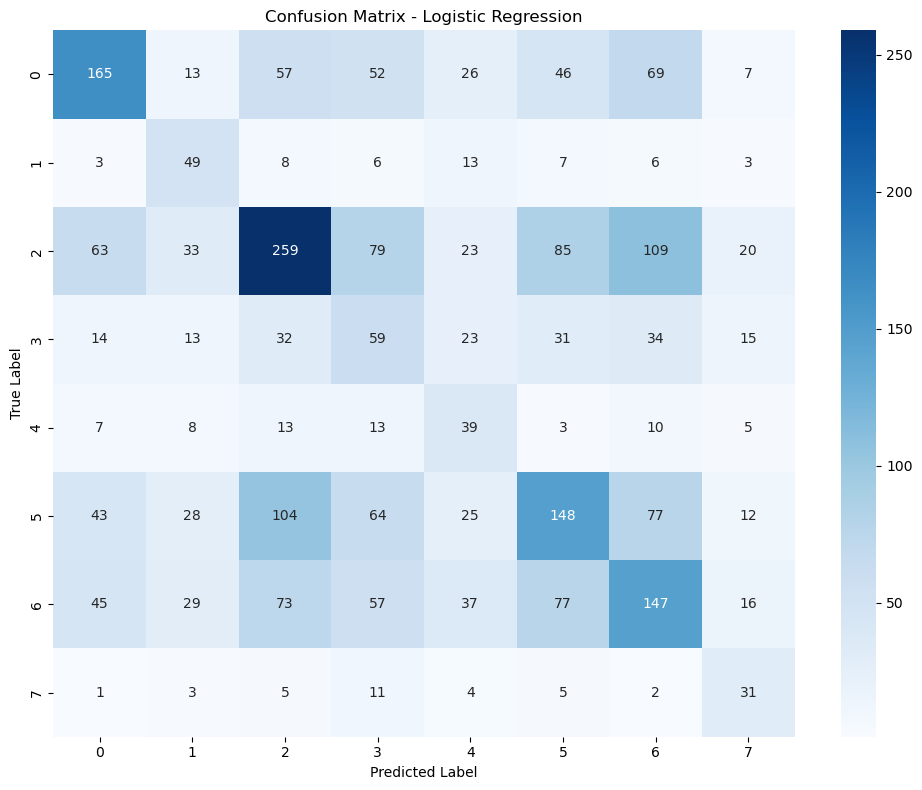


Training Random Forest...

Accuracy: 0.4002

Classification Report:
              precision    recall  f1-score   support

     failure       0.51      0.37      0.43       435
  innovation       0.32      0.45      0.37        95
  leadership       0.43      0.62      0.51       671
  motivation       0.23      0.12      0.16       221
  resilience       0.34      0.24      0.29        98
        risk       0.37      0.33      0.35       501
     success       0.36      0.33      0.34       481
      vision       0.43      0.42      0.43        62

    accuracy                           0.40      2564
   macro avg       0.37      0.36      0.36      2564
weighted avg       0.39      0.40      0.39      2564



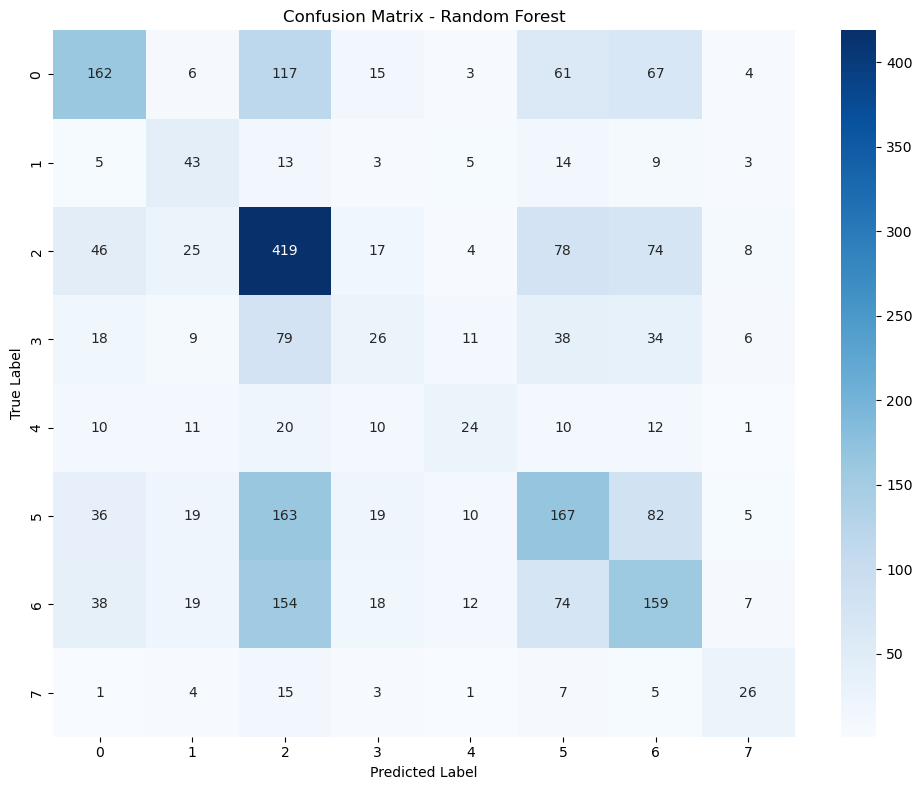


Training Naive Bayes...

Accuracy: 0.3732

Classification Report:
              precision    recall  f1-score   support

     failure       0.54      0.34      0.42       435
  innovation       1.00      0.22      0.36        95
  leadership       0.37      0.68      0.48       671
  motivation       0.43      0.04      0.07       221
  resilience       0.75      0.06      0.11        98
        risk       0.33      0.33      0.33       501
     success       0.31      0.31      0.31       481
      vision       1.00      0.05      0.09        62

    accuracy                           0.37      2564
   macro avg       0.59      0.25      0.27      2564
weighted avg       0.44      0.37      0.34      2564



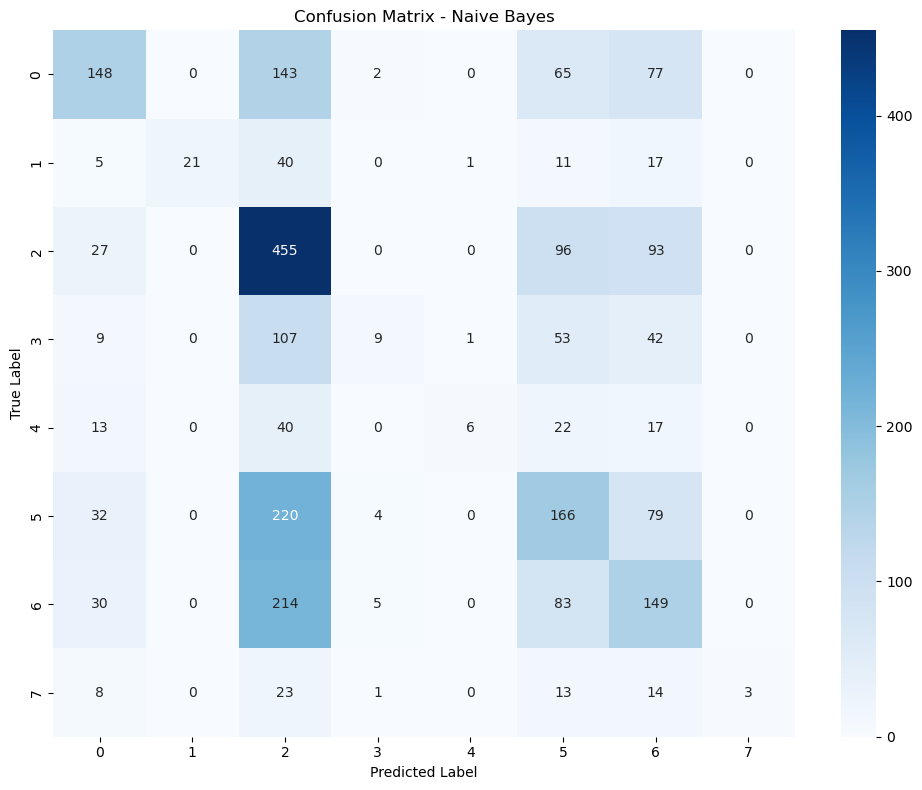


MODEL COMPARISON
Random Forest: 0.4002
Naive Bayes: 0.3732
Logistic Regression: 0.3498


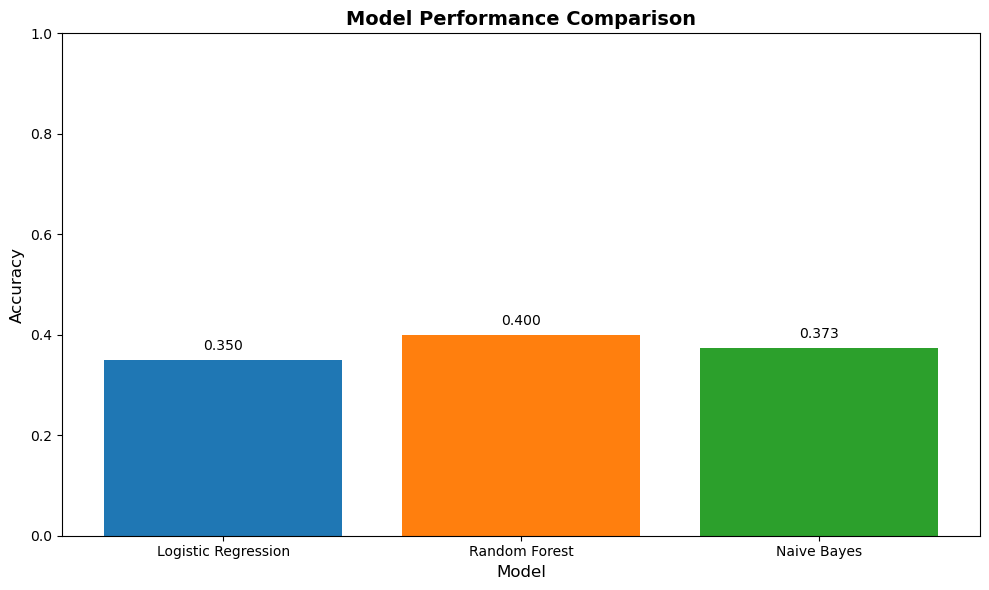


Top 10 features for: failure
1. failure: 4.4157
2. voltaire: 3.8732
3. failures: 3.0915
4. fail: 3.0805
5. kennedy: 2.5673
6. failed: 2.3108
7. hate: 2.1304
8. art: 1.7900
9. science: 1.7744
10. john kennedy: 1.7532

Top 10 features for: innovation
1. innovation: 7.0286
2. real: 2.7916
3. ideas: 2.7876
4. human: 2.1273
5. necessity: 1.9631
6. new: 1.9143
7. ones: 1.8140
8. deal: 1.8047
9. create: 1.8009
10. est: 1.7929

Top 10 features for: leadership
1. leadership: 2.6879
2. leader: 2.6382
3. leaders: 2.4384
4. women: 1.7569
5. man: 1.7020
6. jesus: 1.6617
7. peace: 1.6412
8. men: 1.5944
9. quoted: 1.5624
10. lord: 1.4832

Top 10 features for: motivation
1. positive: 2.1582
2. control: 1.9978
3. act: 1.8919
4. fear: 1.8824
5. probably: 1.7124
6. read: 1.6378
7. attitude: 1.5707
8. trans: 1.5688
9. moving: 1.5367
10. believe: 1.5182

Top 10 features for: resilience
1. resilience: 6.6140
2. capacity: 2.6277
3. actions: 2.3818
4. matter: 2.3410
5. break: 1.8763
6. just: 1.8372
7. progre

C:\Users\Enter Store\AppData\Local\Temp\ipykernel_9052\2079223164.py:227: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows_df['predicted_source_summary'] = predictions


In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 1. DATA PREPARATION
# ============================================

# Remove rows with missing values
df_clean = df[['quote', 'source_summary']].dropna()

print(f"Dataset shape: {df_clean.shape}")
print(f"\nSource Summary distribution:")
print(df_clean['source_summary'].value_counts())

# Create Feature and Label sets
X = df_clean['quote']
y = df_clean['source_summary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=123, stratify=y
)

print(f'\nTraining Data: {X_train.shape}')
print(f'Testing Data: {X_test.shape}')

# ============================================
# 2. FEATURE EXTRACTION (TF-IDF)
# ============================================

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=1000,       # Top 1000 words
    ngram_range=(1, 2),      # Unigrams and bigrams
    min_df=2,                # Ignore rare words
    max_df=0.8,              # Ignore very common words
    stop_words='english'     # Remove stop words
)

# Fit on training data and transform both sets
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"\nTF-IDF Feature shape: {X_train_tfidf.shape}")

# ============================================
# 3. TRAIN MULTIPLE MODELS
# ============================================

models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=123,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=123,
        class_weight='balanced'
    ),
    'Naive Bayes': MultinomialNB()
}

results = {}

for name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Training {name}...")
    print(f"{'='*60}")
    
    # Train
    model.fit(X_train_tfidf, y_train)
    
    # Predict
    y_pred = model.predict(X_test_tfidf)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# ============================================
# 4. COMPARE MODELS
# ============================================

print(f"\n{'='*60}")
print("MODEL COMPARISON")
print(f"{'='*60}")
for name, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name}: {acc:.4f}")

# Plot comparison
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
for i, (name, acc) in enumerate(results.items()):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

# ============================================
# 5. SELECT BEST MODEL AND ANALYZE
# ============================================

# Use the best performing model (let's assume Logistic Regression)
best_model = models['Logistic Regression']

# Feature importance (for Logistic Regression)
if hasattr(best_model, 'coef_'):
    feature_names = vectorizer.get_feature_names_out()
    
    # Get top features for each class
    for idx, class_name in enumerate(best_model.classes_):
        print(f"\n{'='*60}")
        print(f"Top 10 features for: {class_name}")
        print(f"{'='*60}")
        
        # Get coefficients for this class
        if len(best_model.classes_) == 2:
            coef = best_model.coef_[0] if idx == 0 else -best_model.coef_[0]
        else:
            coef = best_model.coef_[idx]
        
        # Get top 10 features
        top_indices = np.argsort(coef)[::-1][:10]
        
        for i, feat_idx in enumerate(top_indices, 1):
            print(f"{i}. {feature_names[feat_idx]}: {coef[feat_idx]:.4f}")

# ============================================
# 6. PREDICTION FUNCTION
# ============================================

def predict_source(quote_text, model=best_model, vectorizer=vectorizer):
    """
    Predict the source_summary for a new quote
    
    Parameters:
        quote_text (str): The quote to classify
        model: Trained model
        vectorizer: Fitted TF-IDF vectorizer
    
    Returns:
        dict: Prediction and probabilities
    """
    # Transform the quote
    quote_tfidf = vectorizer.transform([quote_text])
    
    # Predict
    prediction = model.predict(quote_tfidf)[0]
    probabilities = model.predict_proba(quote_tfidf)[0]
    
    # Create results
    results = {
        'predicted_source': prediction,
        'probabilities': dict(zip(model.classes_, probabilities))
    }
    
    return results

# ============================================
# 7. TEST PREDICTIONS
# ============================================

print(f"\n{'='*60}")
print("EXAMPLE PREDICTIONS")
print(f"{'='*60}")

# Test on some examples from the test set
for i in range(5):
    quote = X_test.iloc[i]
    true_source = y_test.iloc[i]
    
    result = predict_source(quote)
    
    print(f"\nQuote: {quote[:100]}...")
    print(f"True Source: {true_source}")
    print(f"Predicted Source: {result['predicted_source']}")
    print(f"Probabilities:")
    for source, prob in sorted(result['probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {source}: {prob:.3f}")
    print("-" * 60)

# ============================================
# 8. PREDICT ON NAN ROWS (if you have them)
# ============================================

# If you have rows with missing source_summary that you want to predict
if 'nan_rows_df' in locals() and len(nan_rows_df) > 0:
    print(f"\n{'='*60}")
    print("PREDICTING MISSING SOURCE_SUMMARY")
    print(f"{'='*60}")
    
    predictions = []
    for idx, row in nan_rows_df.iterrows():
        if pd.notna(row['quote']):
            result = predict_source(row['quote'])
            predictions.append(result['predicted_source'])
        else:
            predictions.append(None)
    
    nan_rows_df['predicted_source_summary'] = predictions
    
    print(f"\nPredicted {sum(pd.notna(predictions))} source summaries")
    print("\nPrediction distribution:")
    print(pd.Series(predictions).value_counts())
    
    # Show sample predictions
    print("\nSample predictions:")
    print(nan_rows_df[['quote', 'predicted_source_summary']].head(10))